# <center>Project-Based Assignment CLO-2</center>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Heryoka Kurniawan - 1301210108
2. Adhitama Wichaksono - 1301210201
3. Farras Rafif - 1301213020

#### Latar Belakang


Obesitas adalah kondisi di mana terjadi gangguan atau kelebihan lemak yang dapat mengganggu kesehatan. Jika tidak segera ditangani, obesitas bisa meningkatkan risiko terjadinya penyakit jantung, hipertensi, hingga diabetes.

Berdasarkan data Organisasi Kesehatan Dunia, ada sekitar 650 juta penduduk usia dewasa yang mengalami obesitas. Di samping itu, ada sekitar 39 juta anak usia di bawah 5 tahun yang menderita obesitas. Sementara itu, data dari Riset Kesehatan Dasar Indonesia menunjukkan bahwa 22 persen atau sekitar 625.000 orang dewasa di Indonesia menderita obesitas.

Indeks massa tubuh adalah cara pengukuran yang biasa digunakan untuk menyaring obesitas. Seseorang masuk ke dalam kategori obesitas jika ia memiliki indeks massa tubuh 25 kg/m2 atau lebih. Obesitas dapat disertai dengan gangguan kesehatan lainnya, seperti tekanan darah tinggi, diabetes, nyeri sendi, maupun penyakit jantung.

Pada anak-anak, obesitas pada umumnya dapat disertai dengan pengisian lemak di bagian payudara, sesak ketika melakukan aktivitas fisik, dan gangguan pubertas.

Umumnya obesitas disebabkan oleh gaya hidup yang tidak sehat, seperti kurang aktivitas fisik dan pola makan yang tidak sehat. Namun, obesitas tidak hanya dapat terjadi akibat gaya hidup, tetapi bisa juga karena pengaruh genetik, kondisi mental, efek samping pengobatan, hingga penyakit tertentu.

Pada laporan ini dilakukan Eksplorasi Kumpulan Data untuk memperkirakan tingkat obesitas berdasarkan kebiasaan makan dan kondisi fisik pada individu dari Kolombia, Peru, dan Meksiko yang diterbitkan di Repositori Pembelajaran Mesin Irvine Universitas California.

Kebiasaan makan, aktivitas fisik, dan gen merupakan faktor yang mempengaruhi kecenderungan obesitas seseorang. Pada laporan ini dilakukan eksplorasi kumpulan data, dan menemukan model layak yang mampu mengetahui berat badan seseorang dan apakah tubuhnya berada dalam kisaran (kesehatan) normal.

In [4]:
# Library

import numpy as np # untuk handling operasi array
import pandas as pd # mengolah dataframe
import random # untuk mengenerate nilai random
import statsmodels.api as sm # perhitungan statistik
from sklearn.preprocessing import MinMaxScaler # normalisasi data
import seaborn as sns # visualisasi
import matplotlib.pyplot as plt # visualisasi

from sklearn.model_selection import train_test_split as tts # untuk memisahkan data training dan testing
from sklearn.metrics import accuracy_score, recall_score, precision_score # untuk evaluasi model

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles # menerima beberapa parameter, seperti jumlah sampel, jumlah fitur, dan tingkat noise
from sklearn.metrics import mean_squared_error # menghitung mean squared error (MSE) antara prediksi dan label sebenarnya
from sklearn.svm import SVC # untuk memisahkan data menggunakan konsep hyperplane
from sklearn.model_selection import train_test_split # untuk membagi dataset menjadi dua set, yaitu set pelatihan dan set pengujian
from sklearn.metrics import accuracy_score # untuk menghitung akurasi model, yaitu persentase data yang diprediksi dengan benar

In [5]:
# Data Preprocessing

# Persiapan data
working_directory = "/content/drive/MyDrive/Regretion/"
file_name = "ObesityDataSet_raw_and_data_sinthetic.csv"
file_path = working_directory + file_name
data = pd.read_csv(file_path)

In [6]:
data.head() # overview data teratas

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.tail() # overview data terbawah

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
data.shape # cek jumlah baris dan kolom

(2111, 17)

In [9]:
data[data.isnull().any(axis=1)] # check data null

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [10]:
data.info() # cek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Berikut adalah penjelasan singkat terkait fitur pada dataset.

##Variabel Independen

•	Gender - (Male/Female)

•	Age - Tahun

•	Height - Dalam Meter

•	Weight – Dalam kg

•	family_history_with_overweight – Riwayat Keluarga Obesitas - Yes or No

•	FAVC – Frekuensi Konsumsi Makanan Tinggi Kalori - Yes/No

•	FCVC – Frekuensi Konsumsi Sayuran - 1 = never, 2 = sometimes, 3 = always

•	NCP – Jumlah Makanan Utama - 1, 2, 3 or 4 meals

•	CAEC – Konsumsi Makanan antara Makanan Utama - No, Sometimes, Frequently, Always

•	Smoke - Perokok - Yes/No

•	CH20 – Konsumsi Air Mineral Harian - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters

•	SCC – Monitoring Konsumsi Kalori - Yes/No

•	FAF – Frekuensi Aktivitas Fisik - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days

•	TUE – Durasi Penggunaan Perangkat Keras - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours

•	CALC – Konsumsi Alkohol - No, Sometimes, Frequently and Always

•	MTRANS – Transportasi yang Digunakan - Public Transportation, Motorbike, Bike, Automobile and Walking

##Variabel Dependen

•	NObeyesdad – Level Obesitas - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III


In [11]:
# Koversi Tipe Object ke Kategori

cols = ["Gender", "family_history_with_overweight",
        "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS",
        "NObeyesdad"]

for col in cols:
  data[col] = data[col].astype('category')

data.info() # cek kembali tipe data setelah dikonversi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   category
 12  FAF                 

In [12]:
# Deskripsi Nilai Data Kategori

for col in cols:
  print("Variabel:", col, "| Jumlah Data Unique:",data[col].nunique(),
        "\n| Data Unique:", [x for x in data[col].unique()], "\n")

Variabel: Gender | Jumlah Data Unique: 2 
| Data Unique: ['Female', 'Male'] 

Variabel: family_history_with_overweight | Jumlah Data Unique: 2 
| Data Unique: ['yes', 'no'] 

Variabel: FAVC | Jumlah Data Unique: 2 
| Data Unique: ['no', 'yes'] 

Variabel: CAEC | Jumlah Data Unique: 4 
| Data Unique: ['Sometimes', 'Frequently', 'Always', 'no'] 

Variabel: SMOKE | Jumlah Data Unique: 2 
| Data Unique: ['no', 'yes'] 

Variabel: SCC | Jumlah Data Unique: 2 
| Data Unique: ['no', 'yes'] 

Variabel: CALC | Jumlah Data Unique: 4 
| Data Unique: ['no', 'Sometimes', 'Frequently', 'Always'] 

Variabel: MTRANS | Jumlah Data Unique: 5 
| Data Unique: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'] 

Variabel: NObeyesdad | Jumlah Data Unique: 7 
| Data Unique: ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'] 



In [13]:
data.describe().T # check statistik data non kategori (Numerik)

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [14]:
# Exploration Data Analysis
# Pada bagian ini akan dibahas analisis data beberapa fitur baik data kategori maupun data numerik.

# Cek Data Kategori
def plot_kategori(data, kategori, order = None):
  plt.figure(figsize=(15,6))
  ax = sns.countplot(x = kategori, data = data, palette = "hls", order = order)
  for p in ax.patches:
    ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.15, p.get_height()+0.1),
                    ha = "center", va = "top", color = "white", size = 12)

  plt.title(f"Jumlah item tiap kategori {kategori}")
  plt.show()

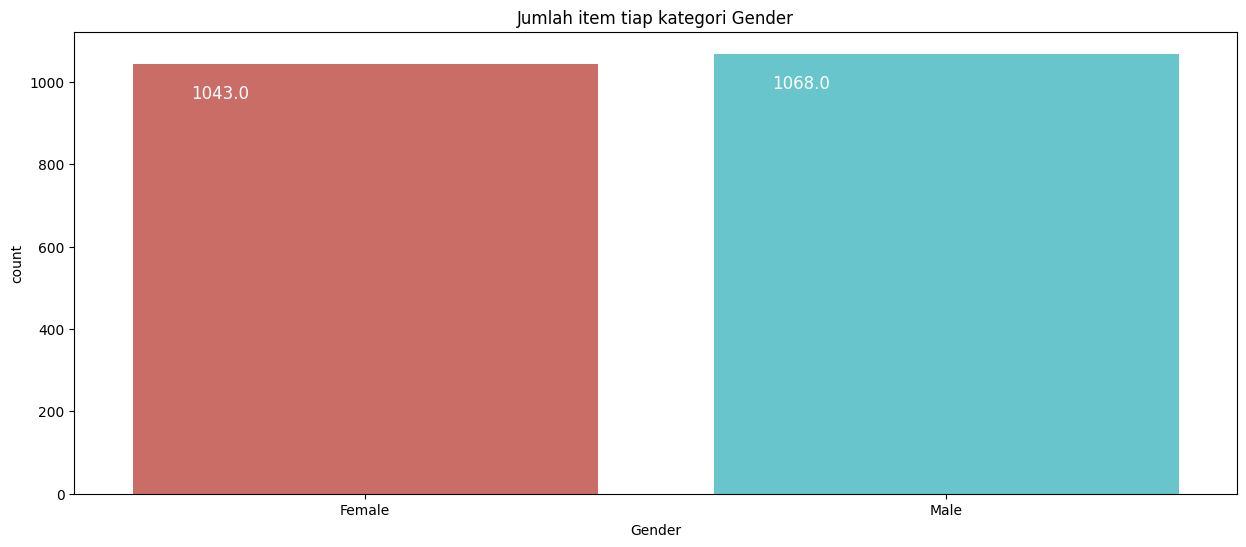

In [15]:
# Gender

plot_kategori(data, "Gender")

Penjelasan untuk Gender

Jumlah perempuan dan laki-laki dalam kumpulan data hampir sama. Data tersedia untuk laki-laki lebih banyak dibandingkan perempuan, namun hal ini tidak menjadikannya tidak seimbang.

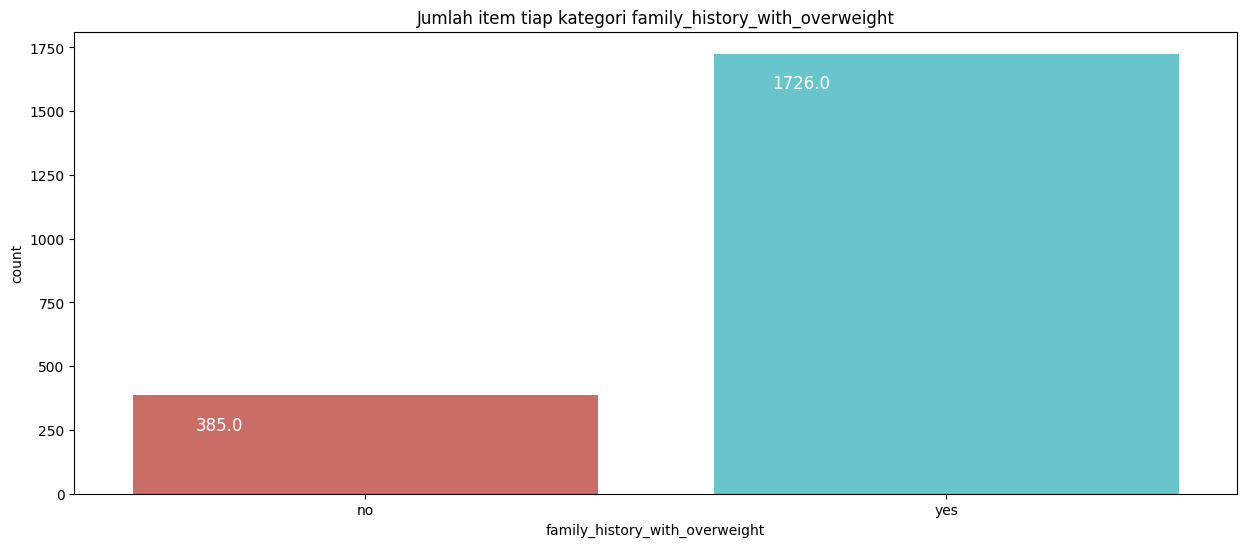

In [16]:
# family_history_with_overweight

plot_kategori(data, "family_history_with_overweight")

Penjelasan untuk family history with overweight

Orang-orang ditanya apakah anggota keluarga menderita kelebihan berat badan. Kebanyakan dari mereka menjawab setuju.

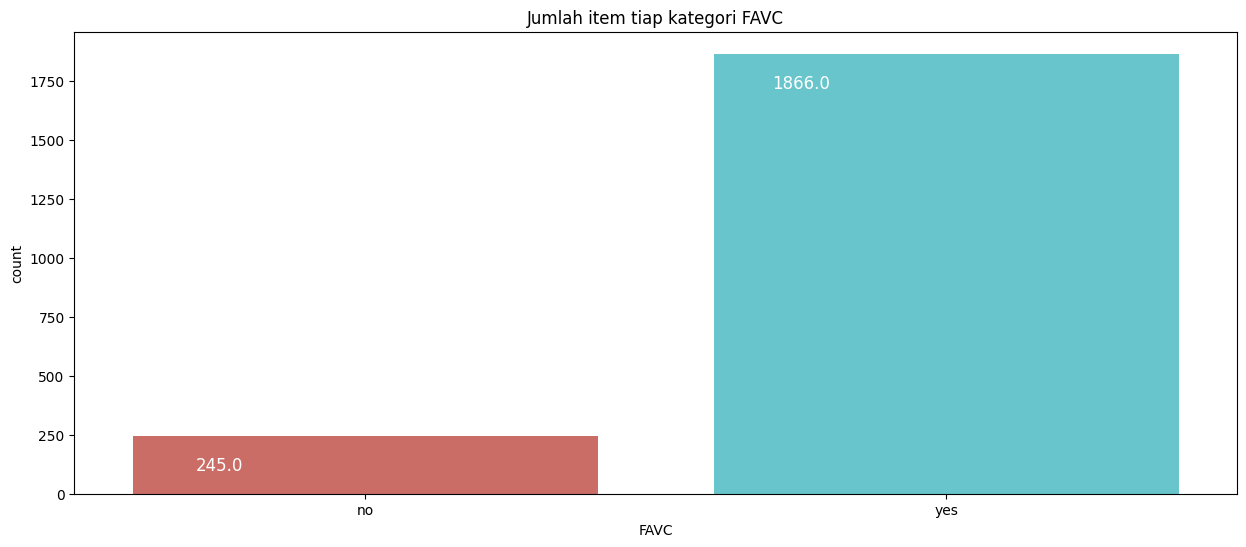

In [17]:
# FAVC

plot_kategori(data, "FAVC")

Penjelasan untuk FAVC

Responden survei sempat mengatakan apakah mereka sering mengonsumsi makanan berkalori tinggi. Hanya ada dua kemungkinan jawaban: “ya” atau “tidak”. Sebagian besar dari mereka mengaku mengonsumsi makanan berkalori tinggi.

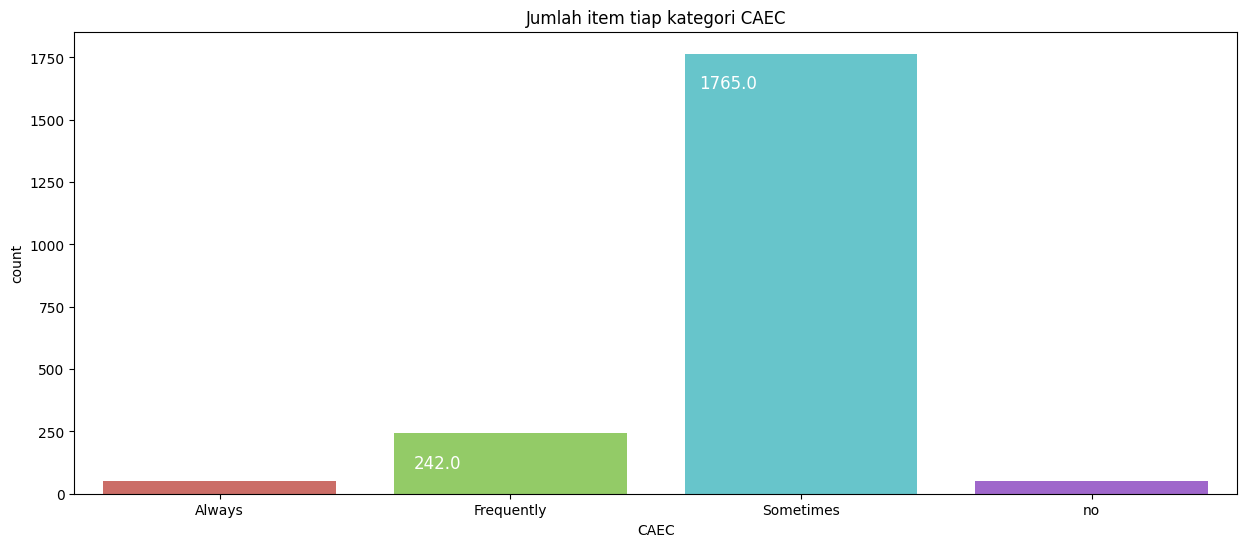

In [18]:
# CAEC

plot_kategori(data, "CAEC")

Penjelasan untuk CAEC

Orang-orang harus mengatakan apakah dan seberapa sering mereka makan di antara waktu makan. Mereka dapat menjawab lebih dari "Tidak" (jika mereka tidak mendapat jatah makan di antara waktu makan yang biasa), atau "Kadang-kadang", "Sering", atau "Selalu". Data menunjukkan bahwa kebanyakan orang “terkadang” makan camilan kecil di antara waktu makan.

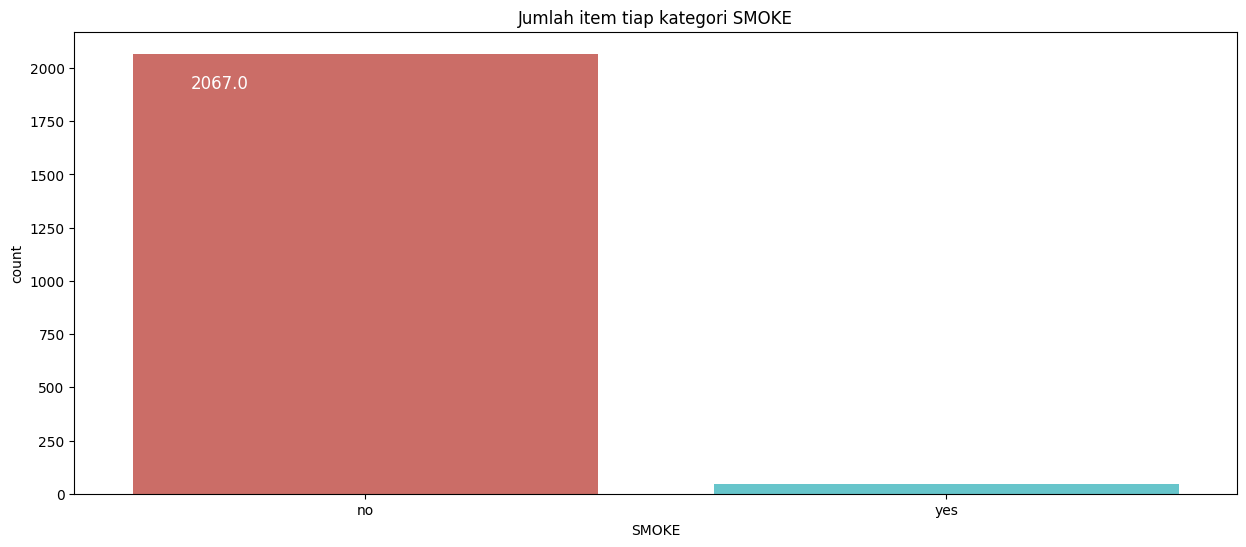

In [19]:
# SMOKE

plot_kategori(data, "SMOKE")

Penjelasan untuk SMOKE

Sebagian besar responden tidak merokok

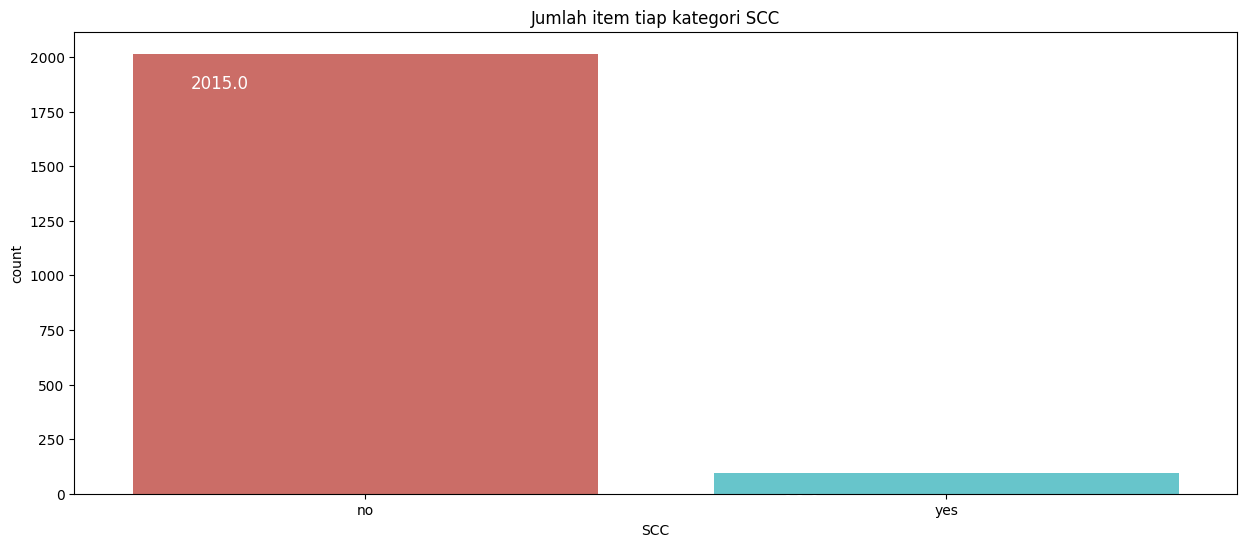

In [20]:
# SCC

plot_kategori(data, "SCC")

Penjelasan untuk SCC

Tampaknya orang tidak khawatir dengan kalori yang mereka dapatkan setiap hari. Di sisi lain, mereka mungkin tidak mengetahui nilai gizi dan kandungan setiap makanan jika tidak tercantum pada kemasannya.

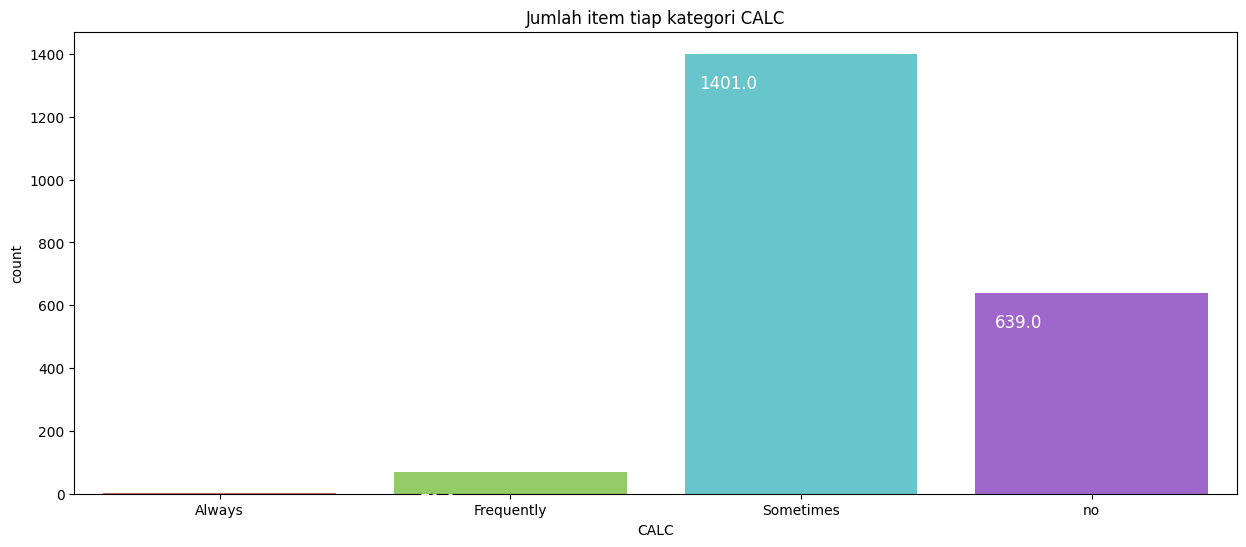

In [21]:
# CALC

plot_kategori(data, "CALC")

Penjelasan untuk CALC

Kebanyakan orang meminum alkohol "kadang-kadang", tetapi hampir sepertiganya menyatakan bahwa mereka tidak mengonsumsi minuman beralkohol apa pun.

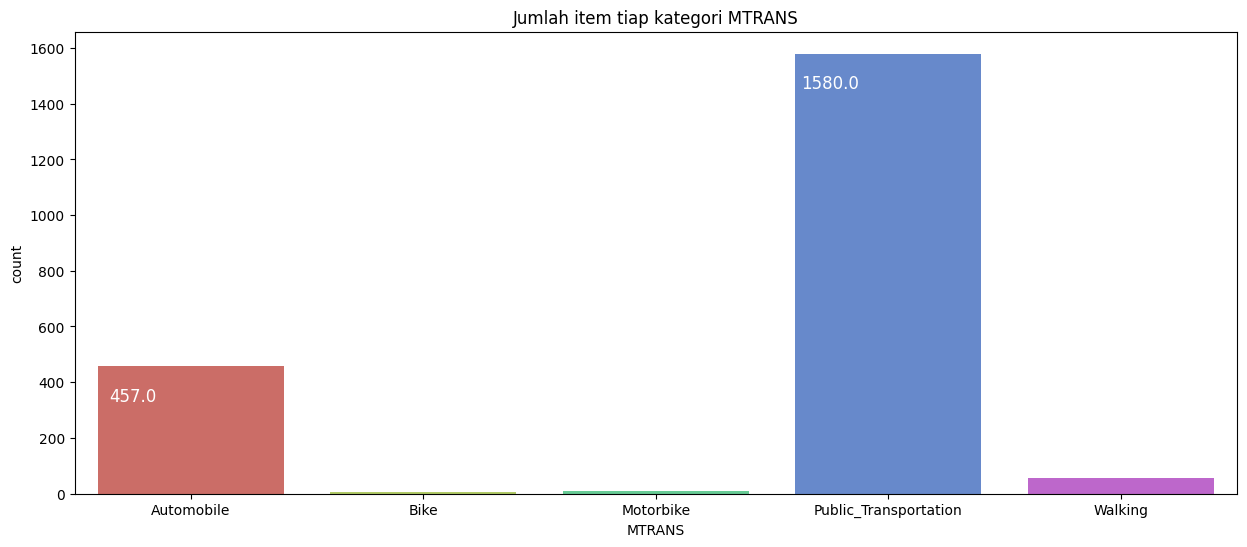

In [22]:
# MTRANS

plot_kategori(data, "MTRANS")

Penjelasan untuk MTRANS

Kebanyakan masyarakat bergantung pada transportasi umum. Jauh lebih sedikit responden yang menggunakan mobil mereka. Sisanya pulang pergi atau menggunakan sepeda motor, sepeda, berjalan.

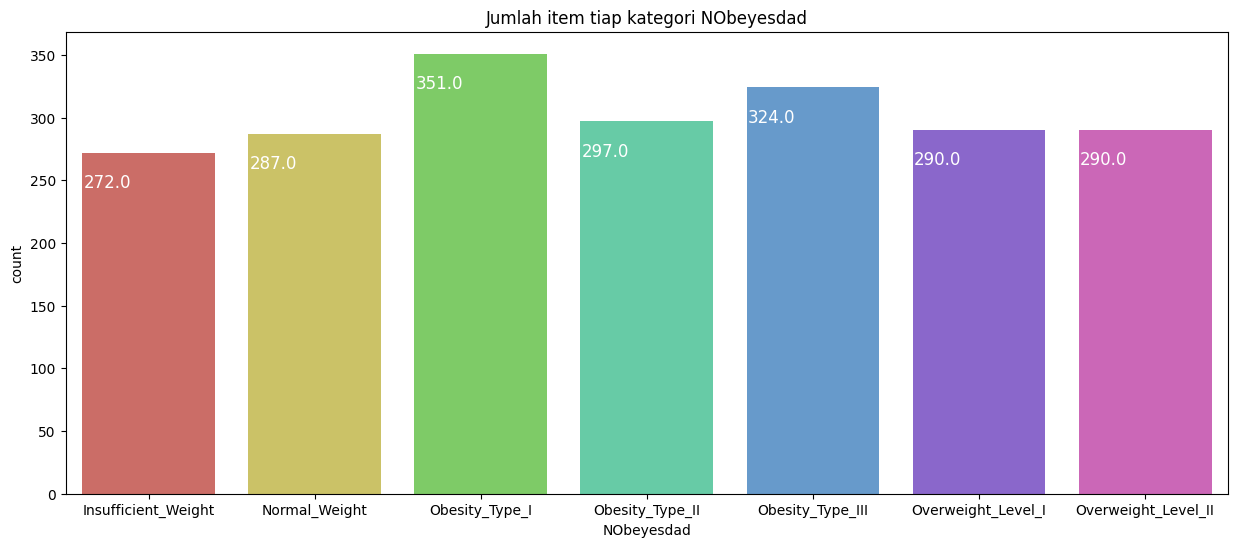

In [23]:
# NObeyesdad

plot_kategori(data, "NObeyesdad")

Penjelasan untuk NObeyesdad

Manusia menurut indeks massa tubuh (IMT) dibedakan menjadi:

Berat badan kurang jika BMI < 18,5


Normal jika BMI 18,5 - 24,9

Kegemukan jika BMI 25,0 - 29,9

Obesitas I jika BMI 30,0 - 34,9

Obesitas II jika BMI 35,0 hingga 39,9

Obesitas III jika BMI > 40

<ipython-input-24-a3ef2cbe309d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


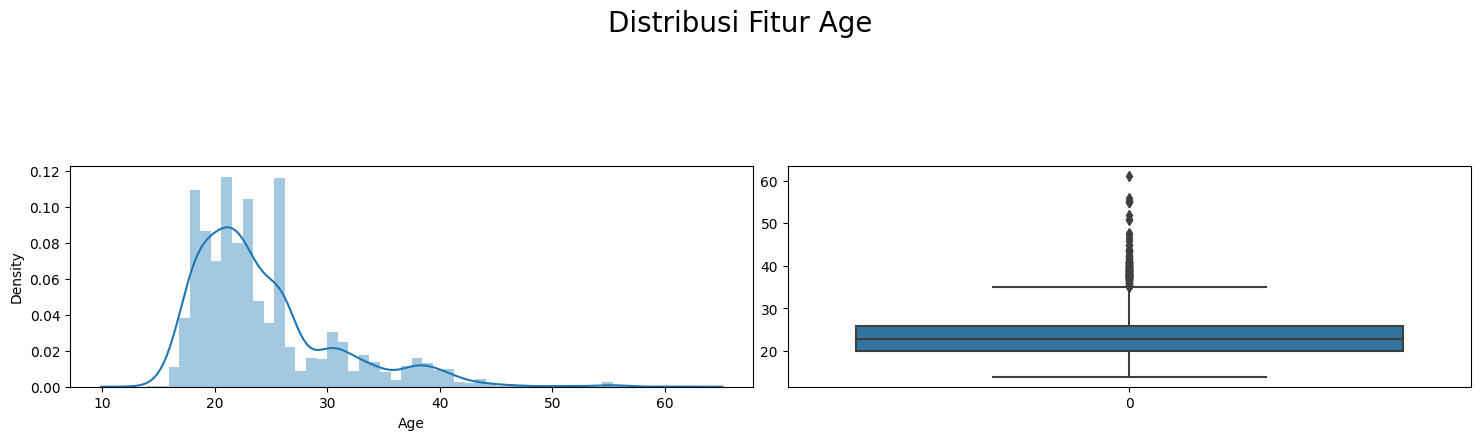

In [24]:
# Data

# Cek Data Numerik

# Age

numerik = "Age"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur Age

Orang termuda dalam kumpulan data berusia 14 tahun, dan yang tertua berusia 61 tahun. Nilai pada kolom ini tidak terdistribusi normal; histogramnya miring positif dengan mean (24,31) dan median (22,78) lebih dekat ke batas bawah.

<ipython-input-25-1daa311c4bfa>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


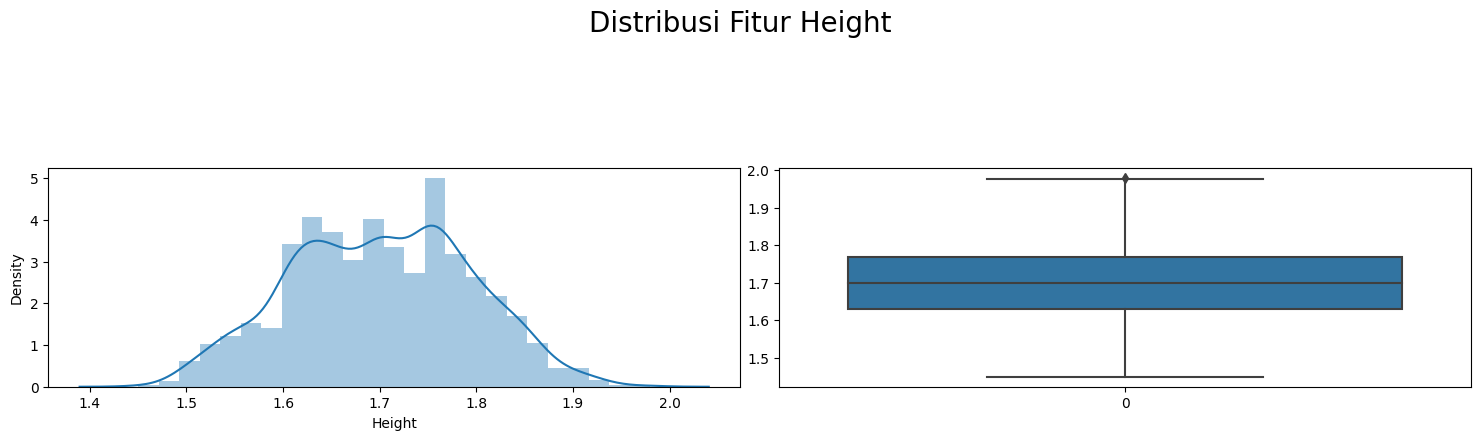

In [25]:
# Height

numerik = "Height"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur Height

Obesitas ditentukan dengan menghitung indeks massa tubuh. Ini adalah fungsi dari tinggi dan berat badan seseorang. Rumus tepatnya adalah

BMI=Weight/(Height x Height)

Oleh karena itu, tinggi badan merupakan salah satu faktor penting dalam menentukan obesitas.

Distribusi nilai ketinggian diplot di bawah ini. Kebanyakan orang memiliki tinggi 1,60 m - 1,85 m. Nilai mean dan median keduanya sekitar 1,70. Namun, nilai ketinggian tampaknya tidak terdistribusi secara normal.

<ipython-input-26-9c4bee12dfe3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


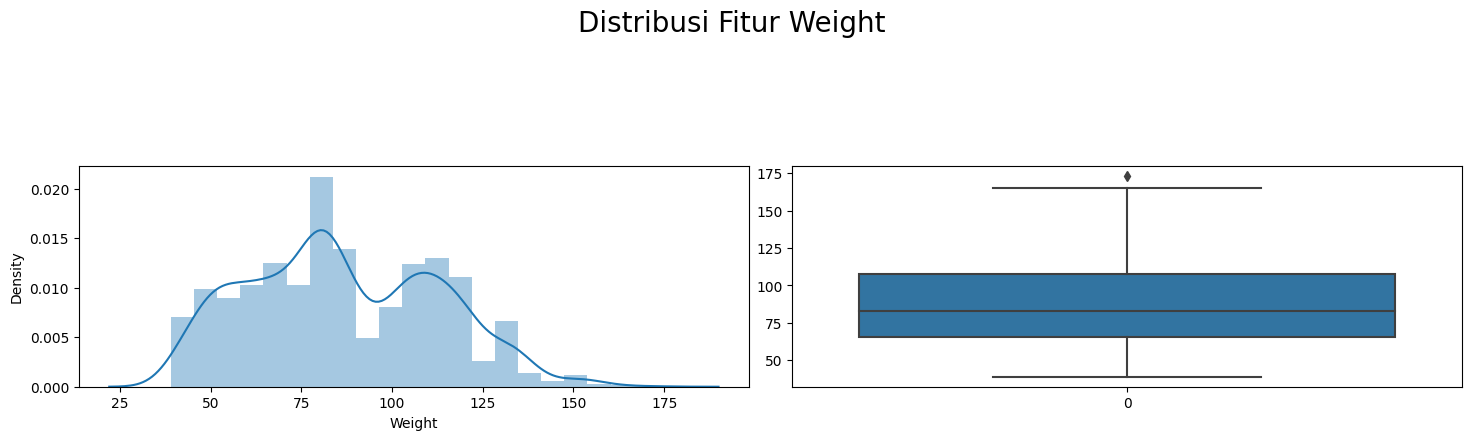

In [26]:
# Weight

numerik = "Weight"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur Weight

Bobot tidak menawarkan pengamatan yang menarik. Distribusinya kurang lebih bersifat bi-modal; mean dan median digeser ke kiri karena banyaknya orang yang berbobot 80 kg.

<ipython-input-27-35de155e7842>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


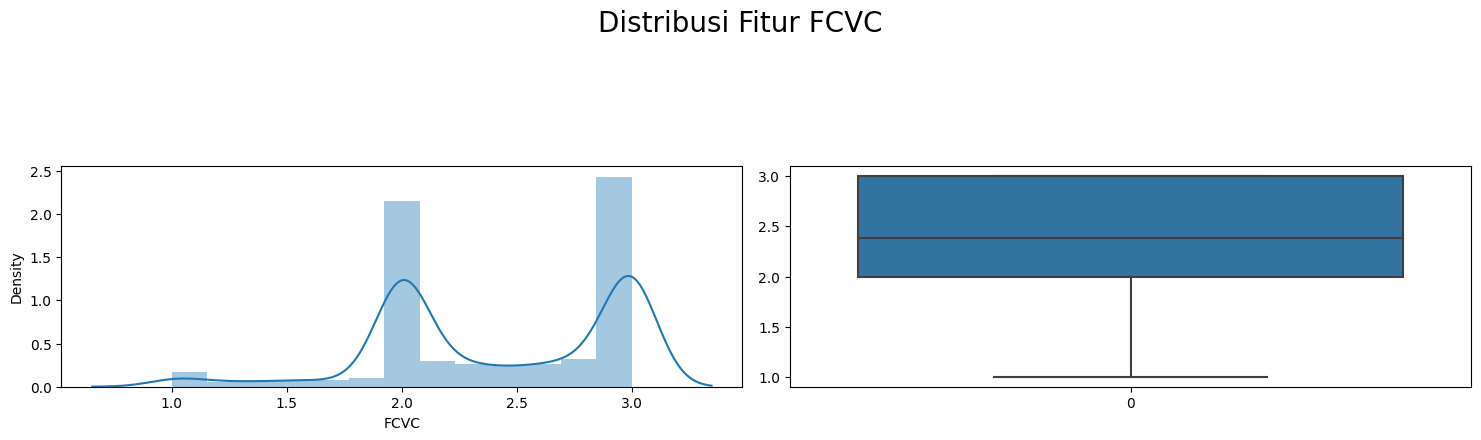

In [27]:
# FCVC

numerik = "FCVC"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur FCVC

Kolom “FCVC” menunjukkan jika masyarakat mengonsumsi sayur-sayuran. Jawaban yang mungkin adalah “Tidak Pernah”, “Kadang-kadang”, dan “Selalu”. Tidak jelas mengapa nilai bersifat numerik dan bukan nilai kategorikal (diskrit). Dapat diasumsikan bahwa "3" berarti "Selalu", "2" - "Kadang-kadang", dan "1" - "Tidak Pernah", namun tidak jelas apa arti nilai-nilai di antara keduanya.

<ipython-input-28-168f29709a78>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


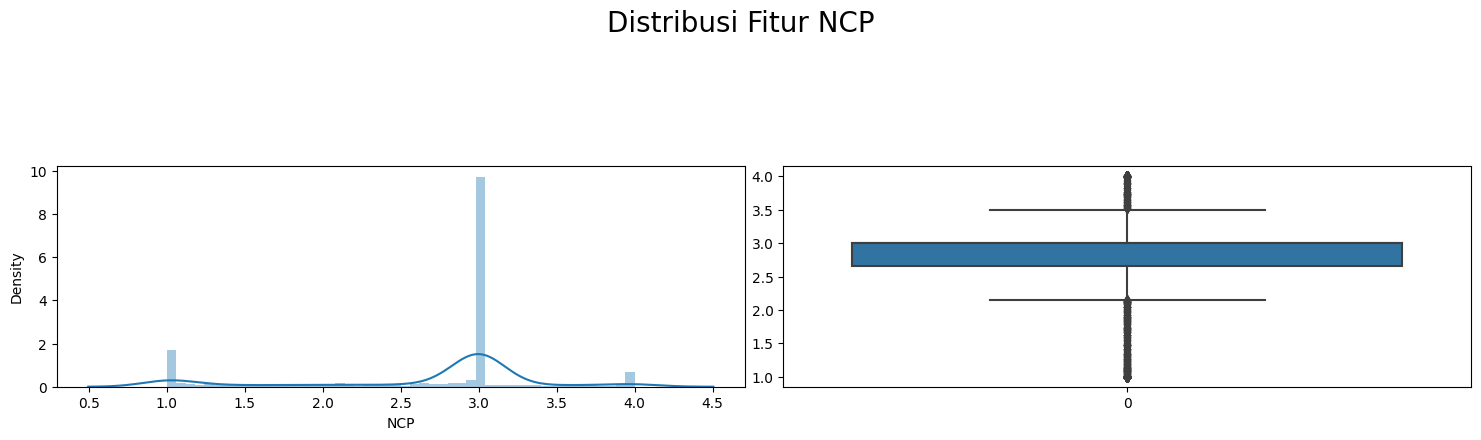

In [28]:
# NCP

numerik = "NCP"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur NCP

Demikian pula, responden harus menyebutkan jumlah makanan utama yang mereka makan sehari-hari: “Antara 1 dan 2”, “Tiga”, dan “Lebih dari tiga”. Selain kategorikal, fitur ini juga menyimpan nilai numerik. Mean dan median juga tidak informatif di sini.

<ipython-input-29-47438ac25931>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


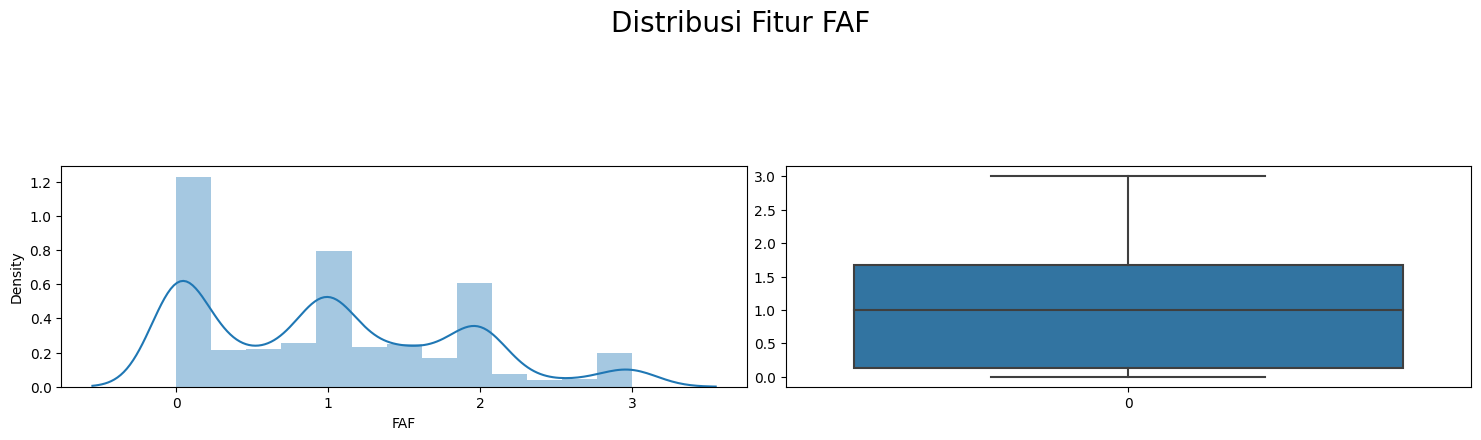

In [29]:
# FAF

numerik = "FAF"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur FAF

Responden diminta menceritakan aktivitas fisiknya. Mereka harus memilih 1 dari 4 pilihan jawaban: "Saya tidak punya", "1 atau 2 hari", "2 atau 4 hari", dan "4 atau 5 hari". Nilai dalam kolom "FAF" bersifat kontinu dan bukan nilai kategorikal. Ini diplot di bawah tetapi distribusinya (serta mean dan median) sulit untuk ditafsirkan.

<ipython-input-30-a278a3e1892c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


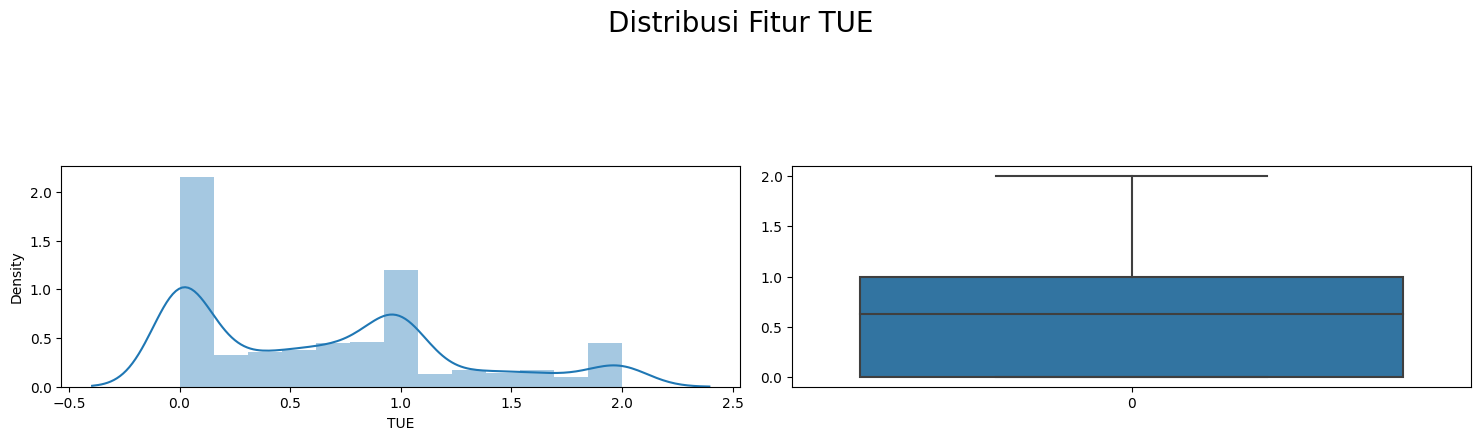

In [30]:
# TUE

numerik = "TUE"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur TUE

Demikian pula, masyarakat diminta menyatakan berapa banyak waktu yang mereka habiskan untuk menggunakan perangkat teknologi seperti ponsel, video game, televisi, komputer, dll. Mereka dapat mengatakan "0-2 jam", "3-5 jam", dan "Lebih dari 5 jam". Respons disimpan sebagai nilai berkelanjutan. Distribusinya, yang tidak dapat diinterpretasikan, ditunjukkan di bawah ini.

Pada tugas ini data target yang akan diteliti adalah Weight atau berat badan penderita diabetes. Berikut adalah analisis terhadap masing-masing fitur.

<ipython-input-31-a278a3e1892c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerik], kde=True)


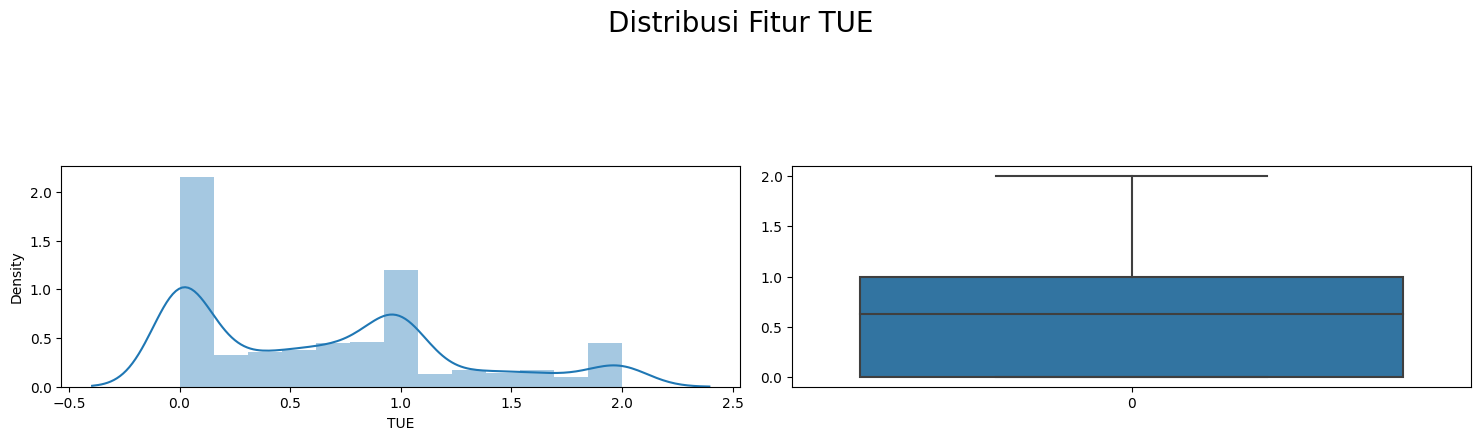

In [31]:
# TUE

numerik = "TUE"
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.distplot(data[numerik], kde=True)

ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(data[numerik])

fig.suptitle(f"Distribusi Fitur {numerik}", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

Distribusi Fitur TUE

Demikian pula, masyarakat diminta menyatakan berapa banyak waktu yang mereka habiskan untuk menggunakan perangkat teknologi seperti ponsel, video game, televisi, komputer, dll. Mereka dapat mengatakan "0-2 jam", "3-5 jam", dan "Lebih dari 5 jam". Respons disimpan sebagai nilai berkelanjutan. Distribusinya, yang tidak dapat diinterpretasikan, ditunjukkan di bawah ini.

Pada tugas ini data target yang akan diteliti adalah Weight atau berat badan penderita diabetes. Berikut adalah analisis terhadap masing-masing fitur.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs Gender')

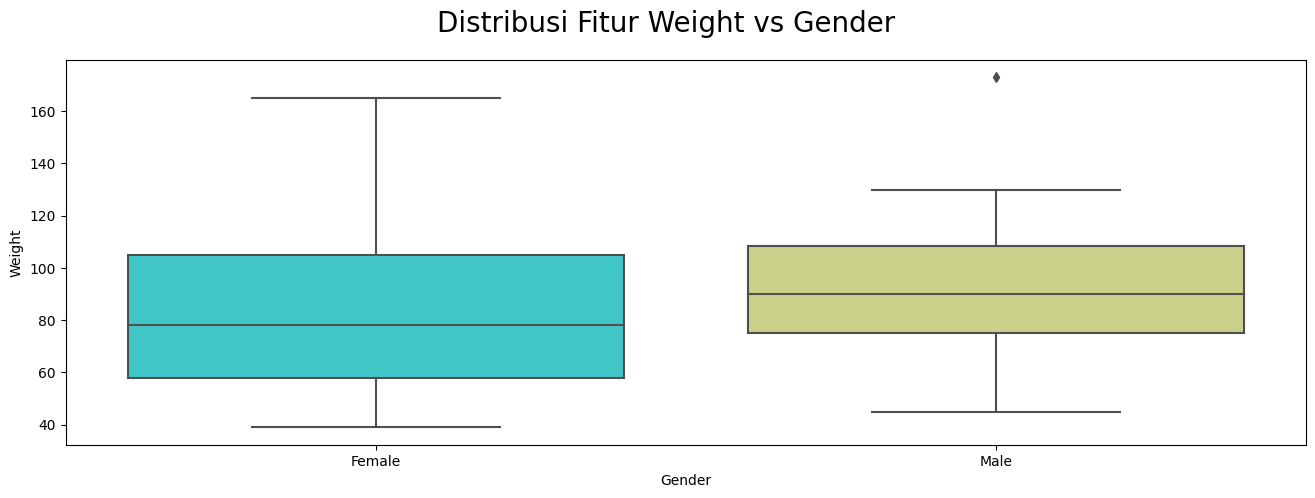

In [32]:
# Data Weight vs Gender

# Weight vs Gender

kategori = "Gender"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs Gender

Dari dataset didapat bahwa rentang berat untuk Wanita berada di antara 60-100 kg dengan median sekitar 60 kg, sedangkan untuk pria berada di antara 80-10 kg. Hal tersebut menunjukkan bahwa kebanyakan pria memiliki berat badan yang lebih berat dibanding wanita.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs family_history_with_overweight')

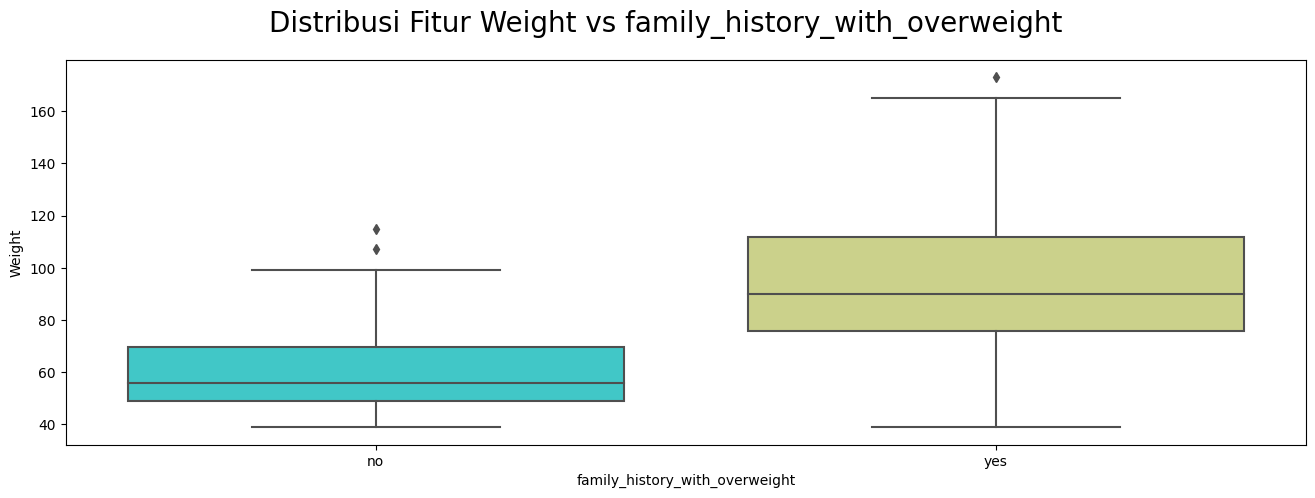

In [33]:
# Weight vs family_history_with_overweight

kategori = "family_history_with_overweight"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs family history with overwight

Dari dataset dapat dilihat bahwa berat badan lebih tinggi dengan penderita yang memiliki riwayat keluarga obesitas.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs FAVC')

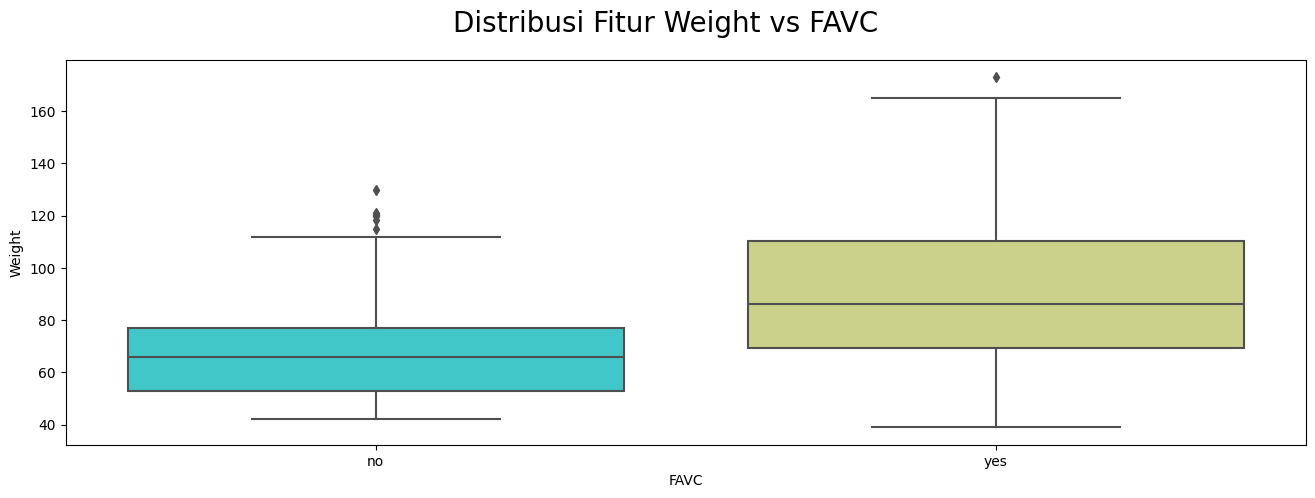

In [34]:
# Weight vs FAVC

kategori = "FAVC"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs FAVC

Dari dataset didapatkan bahwa berat badan lebih tinggi terjadi pada penderita yang sering mengkonsumsi makanan tinggi kalori.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs CAEC')

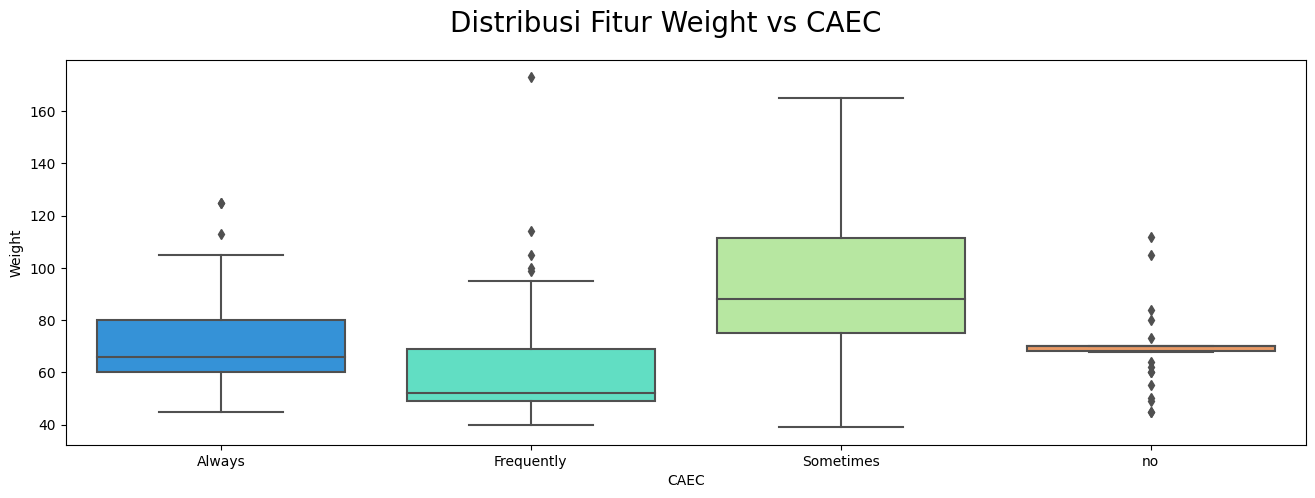

In [35]:
# Weight vs CAEC

kategori = "CAEC"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs CAEC

Dari dataset didapatkan bahwa berat badan dengan rentang lebih tinggi terjadi pada penderita yang sesekali mengkonsumsi camilan ringan disusul dengan yang selalu, tidak sama sekali, dan sering.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs SMOKE')

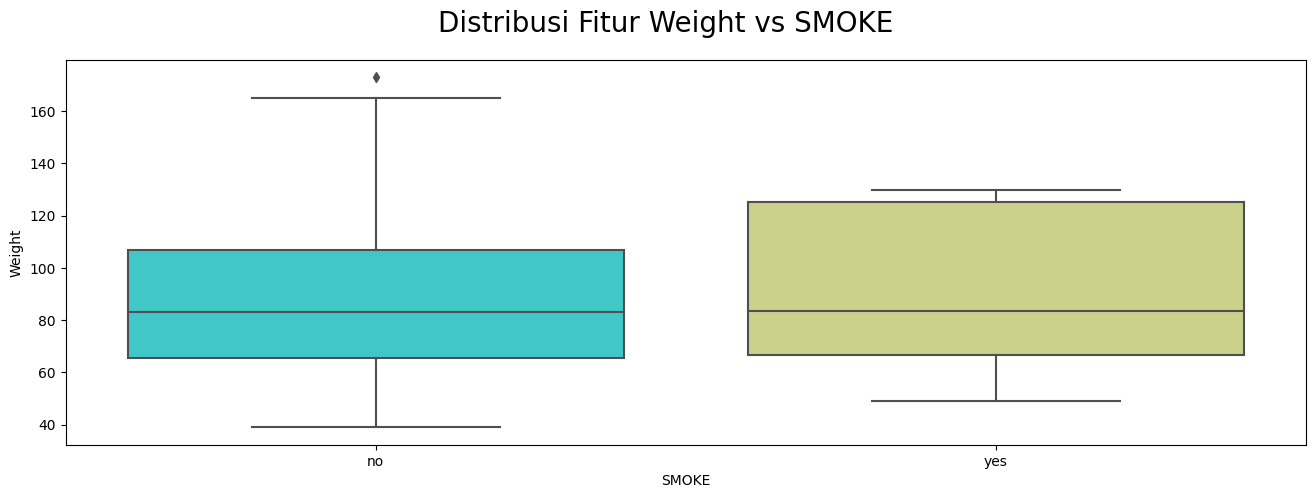

In [36]:
# Weight vs SMOKE

kategori = "SMOKE"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs SMOKE

Dapat dilihat bahwa berat badan perokok memiliki range yang lebih tinggi dibandingkan yang tidak.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs SCC')

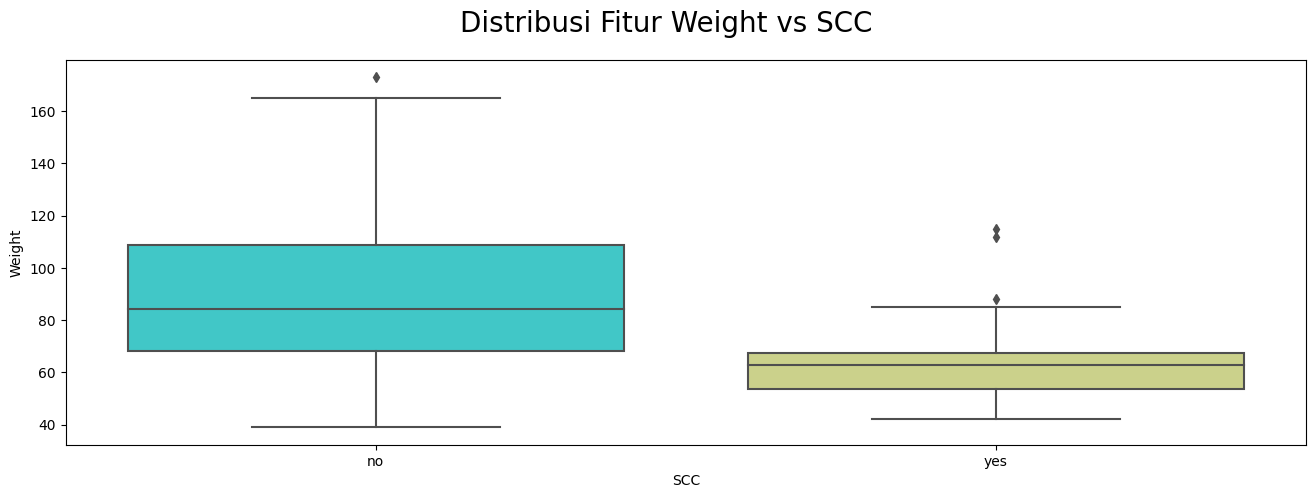

In [37]:
# Weight vs SCC

kategori = "SCC"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs SCC

Dapat dilihat bahwa penderita yang tidak memonitor konsumsi kalori nya memiliki berat badan lebih tinggi dibanding yang memonitor.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs CALC')

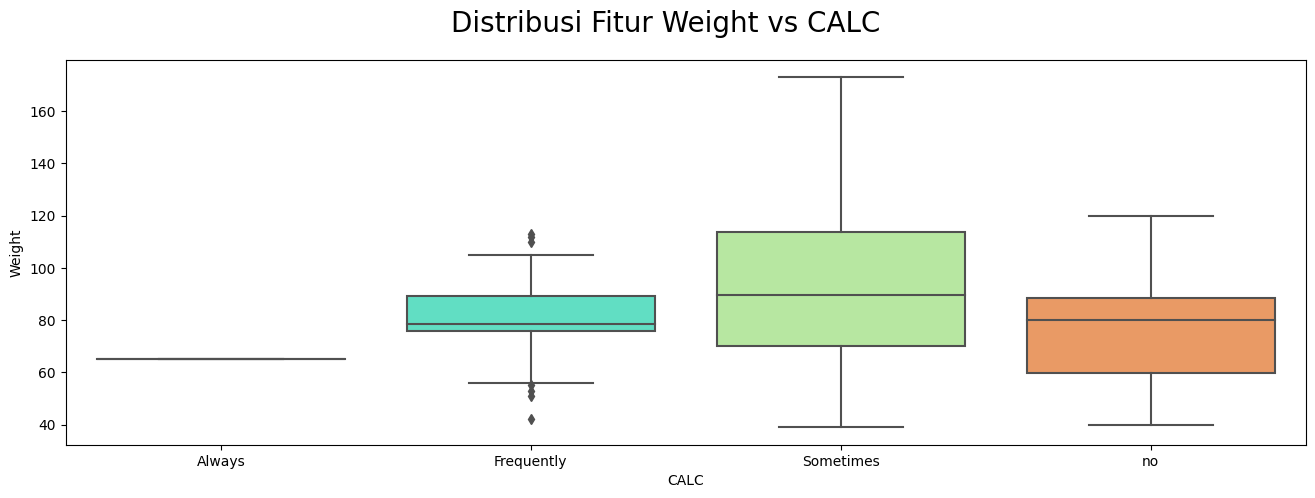

In [38]:
# Weight vs CALC

kategori = "CALC"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Distribusi Fitur Weight vs CALC

Penderita dengan berat badan paling tinggi merupakan konsumen alkohol yang sesekali saja, disusul dengan yang sering dan tidak. Berat badan paling rendah justru ditemukan pada yang tidak mengkonsumsi alkohol sama sekali.

Text(0.5, 0.98, 'Distribusi Fitur Weight vs MTRANS')

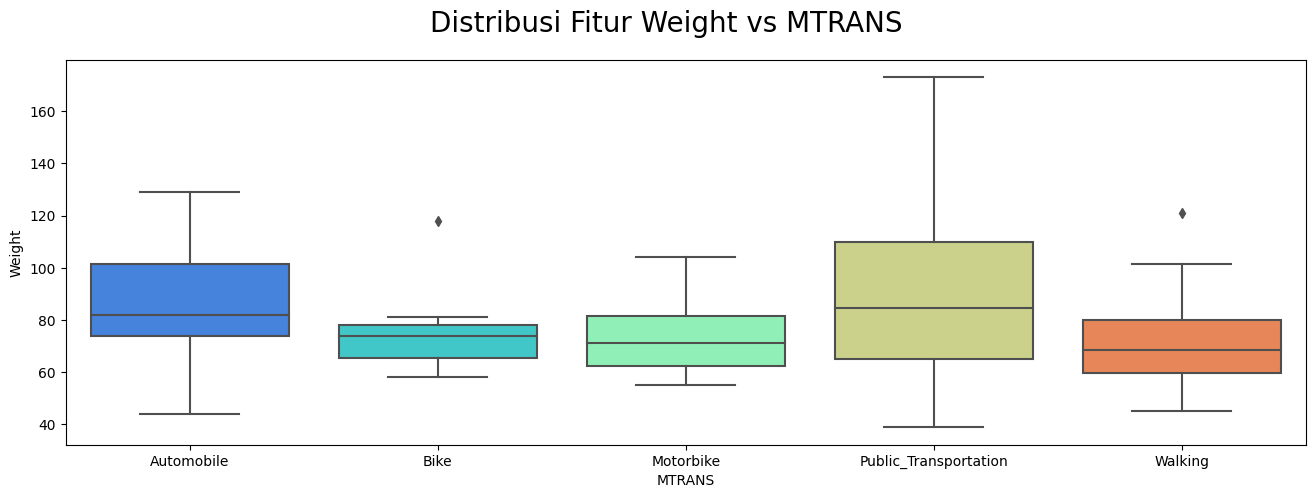

In [39]:
# Weight vs MTRANS

kategori = "MTRANS"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

Text(0.5, 0.98, 'Distribusi Fitur Weight vs NObeyesdad')

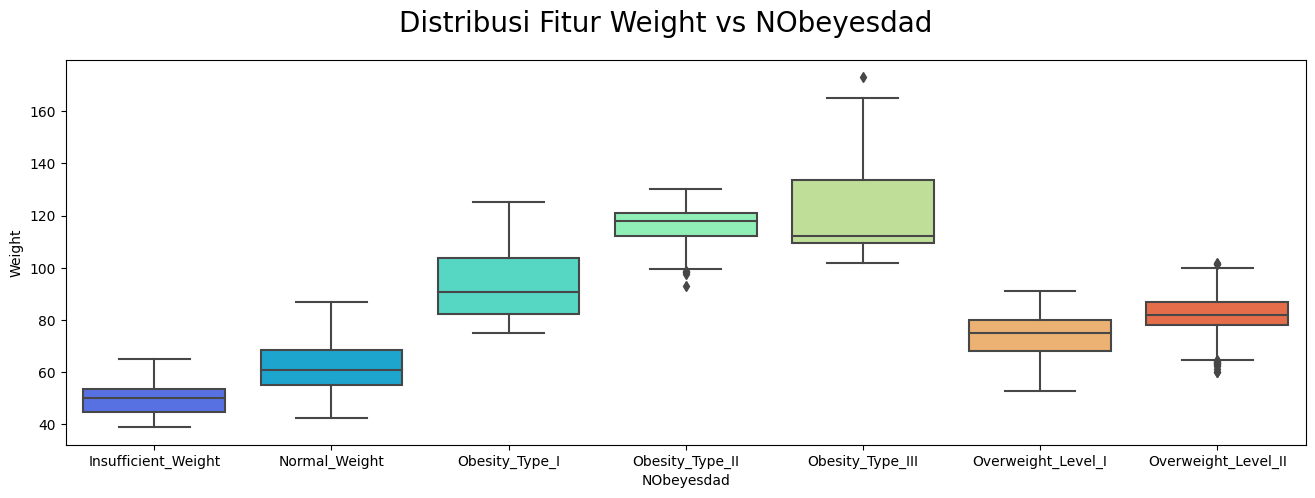

In [40]:
# Weight vs NObeyesdad

kategori = "NObeyesdad"
fig = plt.figure(figsize = (16,5))
sns.boxplot(x=kategori, y="Weight", data=data, palette='rainbow')
fig.suptitle(f"Distribusi Fitur Weight vs {kategori}", fontsize=20)

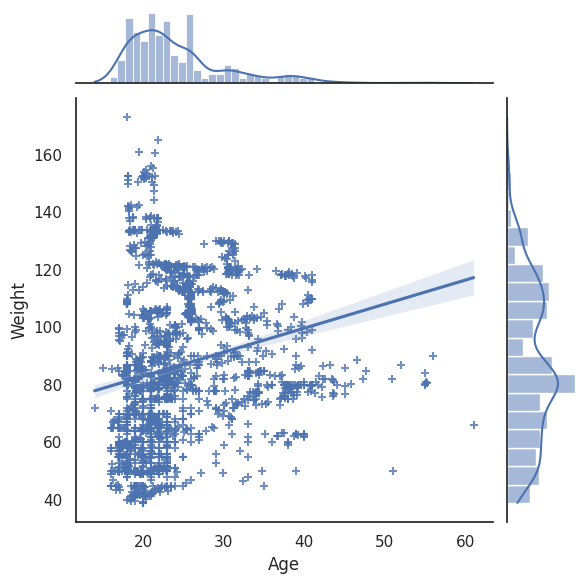

In [41]:
# Korelasi Fitur Weight dan Fitur Numerik

# Age

import seaborn as sns
numerik = "Age"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

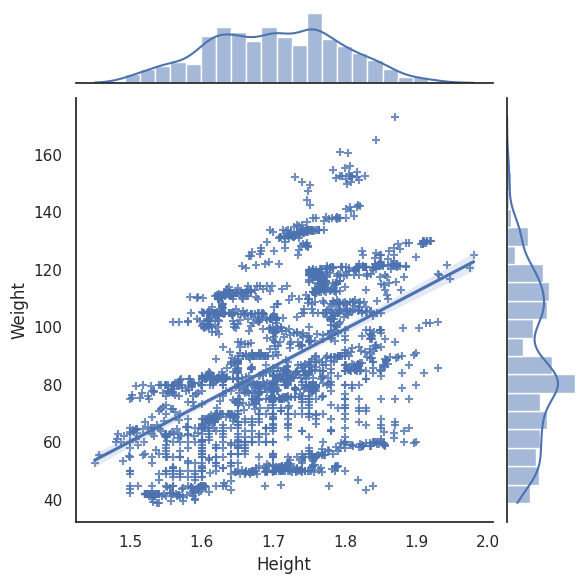

In [42]:
# Height

numerik = "Height"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

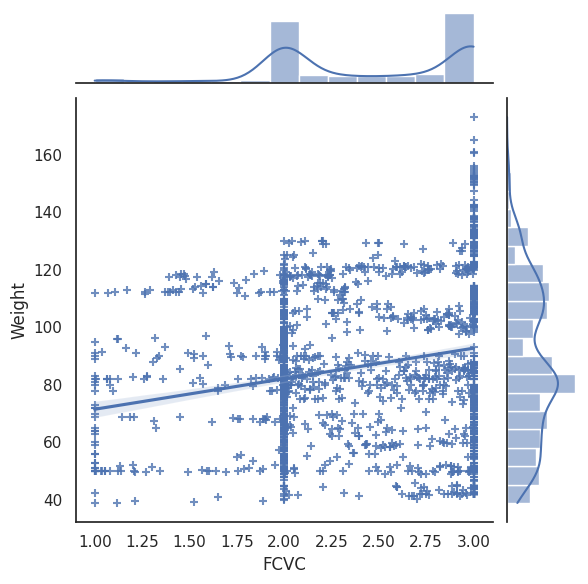

In [43]:
# FCVC

numerik = "FCVC"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

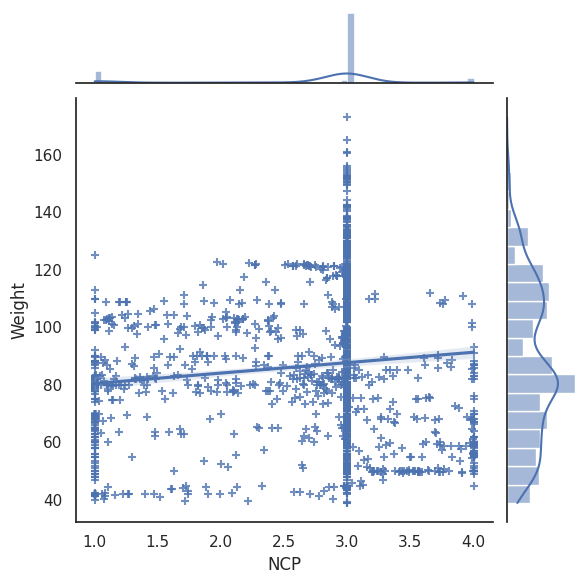

In [44]:
# NCP

numerik = "NCP"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

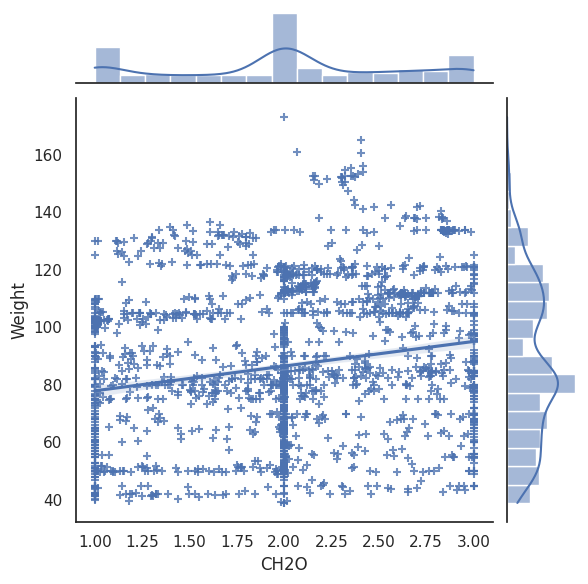

In [45]:
# CH2O

numerik = "CH2O"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

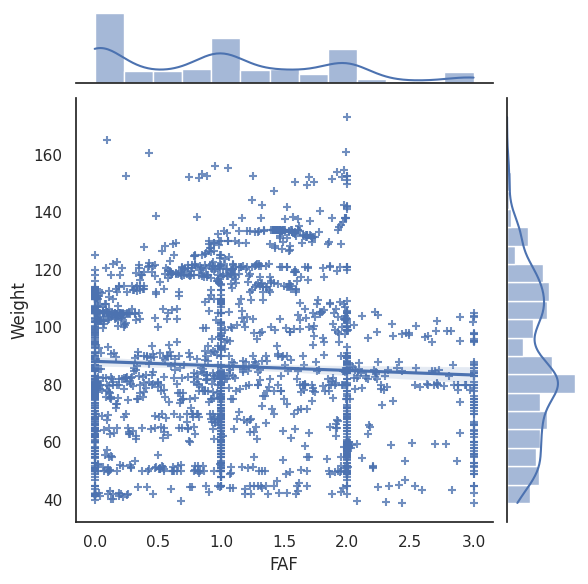

In [46]:
# FAF

numerik = "FAF"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

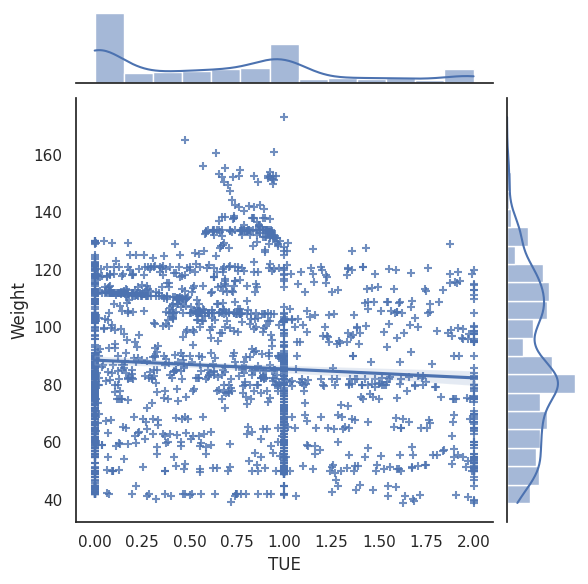

In [47]:
# TUE

numerik = "TUE"
sns.set(style='white')
sns.jointplot(x=numerik, y="Weight", data=data, kind='reg', marker="+")

<ipython-input-48-4472e5ea8dc4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


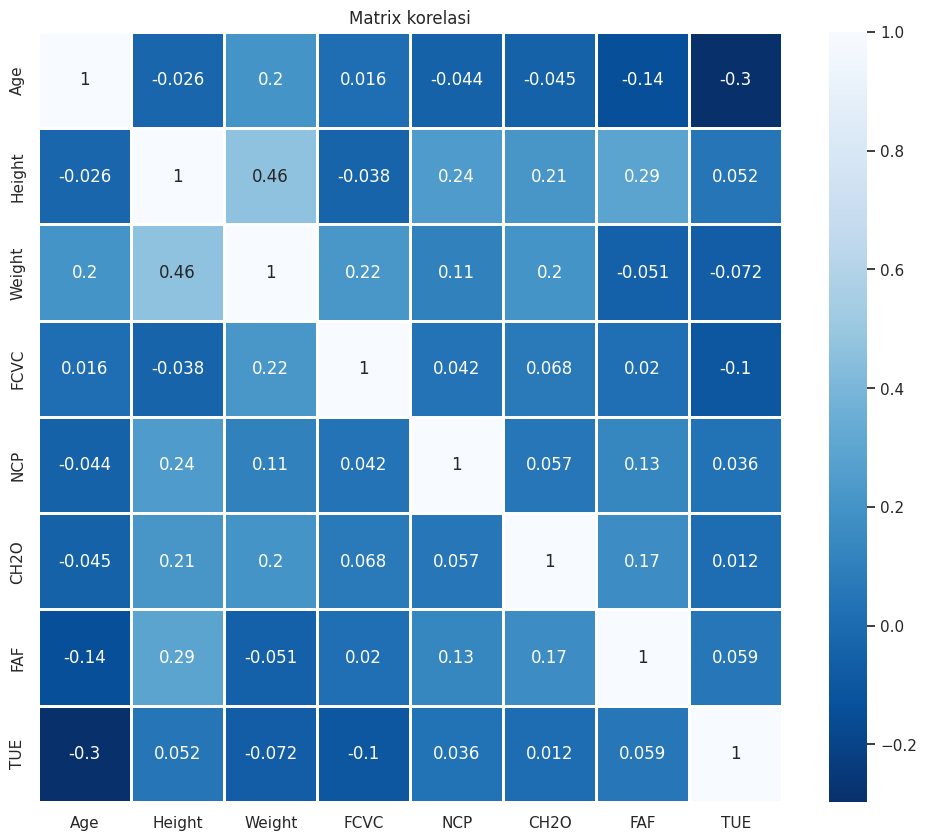

In [48]:
# Korelasi Linear

plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2,
           linecolor = "white")
plt.title("Matrix korelasi")
plt.show()

Korelasi Linear

Dari hasil plot korelasi linear didapatkan bahwa data memilki kolinearitas yang rendah terhadap berat badan. Untuk itu akan dimodelkan penyelesaian SVM dengan kasus non-linear.

In [49]:
# Encoding Data Kategori
# dilakukan agar model machine learning dapat memahami data kategori

data_dummies = pd.get_dummies(data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [50]:
data_dummies.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
# Ambil Data Numerik

data_numerik = data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [52]:
# Gabung Data Kategori (Encoded) dan Numerik

data_new = pd.concat([data_numerik, data_dummies], axis = 1)
data_new

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,0,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,0,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,0,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,0,...,0,0,0,1,0,0,0,0,1,0


In [53]:
# Ubah Data ke Tipe Float

data_new_float = data_new.astype('float')
data_new_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  family_history_with_overweight_no   2111 non-null   float64
 11  family_history_with_overweight_yes  2111 no

#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

Training Duality SVM

Pada kasus ini akan digunakan 2 jenis kernel yaitu polinomial dan gaussian. Keduanya digunakan karena Kernel polinomial cocok untuk data yang tidak linier, sedangkan kernel gaussian cocok untuk data yang tersebar secara tidak merata.

In [54]:
# Fungsi Kernel

In [55]:
# Kernel Polynomial

Kernel Polynomial

$$
\begin{align}
K_q (x,z) = \phi(x)^T \phi(z) = (c+ x^Tz)^q
\end{align}
$$

In [56]:
def poly_kernel(x,y,d):
    return (1+(np.dot(x,y.T))**d)

In [57]:
# Kernel Gaussian (RBF)

Kernel Gaussian
$$
\begin{align}
K (x,z) = \exp \bigg \{  – \frac{||x-z||^2}{2\sigma^2}  \bigg \}
\end{align}
$$

Dimana σ adalah parameter sebaran yang memiliki peranan serupa pada standard deviasi.

In [58]:
def gaussian_kernel(x,y,gamma):
    return np.exp(-(np.linalg.norm((x.T-y.T))**2)*gamma)

In [59]:
# R Squared Error
# digunakan untuk mencari variansi kuadrat error

# 1 − ∑ ( y i − y i ^ ) 2 ∑ ( y i − y ¯ ) 2
def rsquared_score(Y_test,Y_pred):
    data_var = np.sum((Y_test-np.mean(Y_test,axis=0))**2)
    model_var = np.sum((Y_pred-Y_test)**2)
    expl_var = data_var-model_var
    return float(expl_var/data_var)

In [60]:
# MSE
# Digunakan untuk mencari rata-rata kuadrat error

# Σ(yi − pi)^2(n)
def MSE(pred, Y_test):
    return np.sum(np.square(pred-Y_test))/Y_test.shape[0]

In [61]:
# melakukan scaling data numerik pada dataset
def MinMaxScaler(x_train,x_test):
    minimum = np.min(x_train, axis=0)
    maximum = np.max(x_train,axis= 0)
    x_train = (x_train-minimum)/(maximum-minimum)
    x_test = (x_test-minimum)/(maximum-minimum)
    return x_train,x_test

In [62]:
# Fungsi Training

import cvxopt

# model training dengan kernel polinomial

def train_kernel_poli(X,y,c,kernel_param,epsilon):
    m, n = X.shape # m jumlah datapoints, n jumlah fitur
    # mencari fungsi kernels i.e. k(x,x')
    k = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            k[i][j] = poly_kernel(X[i,:], X[j,:], kernel_param)
    #Matrix P,q,A,b
    #Setelah pendefinisian kernel matrix dilakukan perhitungan optimasi losses dengan fungsi quadratic programming menggunakan matrix P, q, A, b sebagai berikut.
    element1 = k
    P= np.concatenate((element1,-1*element1),axis=1)
    P= np.concatenate((P,-1*P),axis=0)
    q= epsilon*np.ones((2*m,1))
    qadd=np.concatenate((-1*y,y),axis=0)
    q=q+qadd
    A=np.concatenate((np.ones((1,m)),-1*(np.ones((1,m)))),axis=1)

    # https://medium.com/@ahlawat.randeep/svm-from-scratch-using-quadratic-programming-90b4dbc5e1d2
    # mendefinisikan optimisasi dengan quadratic programming
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(np.zeros((1,1)))
    # Matrix G,h
    c= float(c)
    tem3=np.concatenate((np.eye(2*m),-1*np.eye(2*m)),axis=0)
    G=cvxopt.matrix(tem3)
    tem4=np.concatenate((c*np.ones((2*m,1)),np.zeros((2*m,1))),axis=0)
    h = cvxopt.matrix(tem4)
    # penyelesaian solusi optimisasi
    sol = cvxopt.solvers.qp(P,q,G,h,A,b,solver='glpk')

    # Kemudian dengan metode lagrange dilakukan perhitungan pencarian support vectors dan bias sebagai berikut.
    # mendapatkan lagrange multiplier
    l = np.ravel(sol['x'])
    #parting to get the 2 sets of Lagrange multipliers
    u=l[0:m]
    v=l[m:]
    # mendapatkan support vectors
    u1=u > 1e-5
    v1=v > 1e-5
    SV=np.logical_or(u1, v1)
    SVindices = np.arange(len(l)/2)[SV]
    u1=u[SVindices.astype(int)]
    v1=v[SVindices.astype(int)]
    support_vectors_x = X[SV]
    support_vectors_y = y[SV]
    # hitung bias
    bias= sol['y']

    # Fungsi training menghasilkan support vectors, vector weight dan bias sebagai berikut
    return u1, v1, support_vectors_x, bias

In [63]:
# Persiapan Data

X1 = data_new_float.drop(columns = ['Weight']).values
y1 = data_new_float['Weight'].values

In [64]:
# melakukan split dataset dan scaling data numerik

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state = 42)
X_train,X_test = MinMaxScaler(X_train,X_test)
y_train = y_train.reshape((len(X_train), 1))
y_test = y_test.reshape((len(X_test), 1))

In [65]:
# Inisiasi
epsilon = 1.2
c = 1
kernel_param = 1

In [66]:
u1,v1,support_vectors_x, bias = train_kernel_poli(X_train,y_train,c,kernel_param,epsilon) # training

     pcost       dcost       gap    pres   dres
 0: -4.0423e+05 -8.5142e+04  5e+06  4e+01  6e-14
 1: -2.2883e+04 -8.2233e+04  2e+05  1e+00  6e-14
 2: -1.2970e+04 -3.9549e+04  3e+04  8e-13  5e-14
 3: -1.6530e+04 -2.1438e+04  5e+03  2e-13  5e-14
 4: -1.7744e+04 -1.9629e+04  2e+03  4e-13  4e-14
 5: -1.8151e+04 -1.9070e+04  9e+02  5e-13  4e-14
 6: -1.8375e+04 -1.8770e+04  4e+02  3e-13  4e-14
 7: -1.8496e+04 -1.8615e+04  1e+02  3e-13  4e-14
 8: -1.8520e+04 -1.8585e+04  6e+01  4e-13  4e-14
 9: -1.8541e+04 -1.8559e+04  2e+01  1e-13  4e-14
10: -1.8547e+04 -1.8552e+04  5e+00  6e-13  4e-14
11: -1.8549e+04 -1.8550e+04  7e-01  1e-13  5e-14
12: -1.8550e+04 -1.8550e+04  2e-02  1e-13  5e-14
Optimal solution found.


In [67]:
# Untuk mendapatkan nilai regresi digunakan program sebagai berikut
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  res=0
  for u_,v_,z in zip(u1,v1,support_vectors_x):
    res+=(u_ - v_)*poly_kernel(X_test[i],z,kernel_param)
  Y_pred[i]= res
Y_pred = Y_pred+bias[0,0]

In [68]:
Y_pred

array([ 60.95847572, 105.49819508, 101.96751478,  51.67353441,
        85.48909866,  97.14651125, 112.27007066,  95.04810796,
        76.95582663,  66.02871071,  93.42334396, 107.22962857,
        98.20281788,  98.17708103, 105.42110809,  69.59587566,
       100.16618471,  98.58589557, 113.49695193,  85.86481356,
       102.31349081,  84.94022869, 103.29214807,  97.78386466,
        52.84671514,  81.18625588,  85.16237816, 105.69328784,
       104.66518298,  91.90906138, 108.19577915,  89.08990913,
        80.50895441,  87.17172875,  46.76090529, 106.14269912,
        95.96248568,  64.30705961,  73.12614939,  56.80624897,
        87.05219838, 100.81330119,  91.6881413 ,  68.11382666,
       106.52645613,  72.6294996 , 101.5871126 ,  93.84778623,
        73.50097117, 111.51701208,  55.73503425,  60.99448583,
        78.05377203,  68.79947868,  96.30775083,  84.26132362,
       102.1965858 , 111.10623807,  74.83759198,  92.09465778,
        64.90351427, 103.3342615 , 112.84336364,  91.05

In [69]:
y_test

array([[ 53.699561],
       [111.00492 ],
       [ 60.      ],
       [ 42.      ],
       [ 74.      ],
       [ 50.248677],
       [118.332689],
       [ 71.      ],
       [ 78.997166],
       [ 50.079991],
       [ 90.      ],
       [140.292018],
       [ 99.540122],
       [118.382361],
       [110.930509],
       [ 80.      ],
       [124.704781],
       [103.841672],
       [106.452367],
       [ 83.016968],
       [111.235188],
       [ 72.748903],
       [104.879602],
       [108.204547],
       [ 51.      ],
       [ 72.467862],
       [ 80.311273],
       [152.720545],
       [107.378702],
       [ 54.567343],
       [111.95611 ],
       [ 73.193589],
       [ 78.      ],
       [ 56.      ],
       [ 45.      ],
       [114.480696],
       [108.019211],
       [ 60.      ],
       [ 50.      ],
       [ 65.      ],
       [ 53.      ],
       [113.234349],
       [ 75.      ],
       [ 79.      ],
       [ 86.413388],
       [ 50.      ],
       [103.0344  ],
       [ 55. 

In [70]:
# Fungsi Training

import cvxopt

# model training dengan kernel gaussian

def train_kernel_gaussian(X,y,c,kernel_param,epsilon):
    m, n = X.shape # m jumlah datapoints, n jumlah fitur
    # mencari fungsi kernels i.e. k(x,x')
    k = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            k[i][j] = gaussian_kernel(X[i,:], X[j,:], kernel_param)
    #Matrix P,q,A,b
    element1 = k
    P= np.concatenate((element1,-1*element1),axis=1)
    P= np.concatenate((P,-1*P),axis=0)
    q= epsilon*np.ones((2*m,1))
    qadd=np.concatenate((-1*y,y),axis=0)
    q=q+qadd
    A=np.concatenate((np.ones((1,m)),-1*(np.ones((1,m)))),axis=1)

    # https://medium.com/@ahlawat.randeep/svm-from-scratch-using-quadratic-programming-90b4dbc5e1d2
    # mendefinisikan optimisasi dengan quadratic programming
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(np.zeros((1,1)))
    # Matrix G,h
    c= float(c)
    tem3=np.concatenate((np.eye(2*m),-1*np.eye(2*m)),axis=0)
    G=cvxopt.matrix(tem3)
    tem4=np.concatenate((c*np.ones((2*m,1)),np.zeros((2*m,1))),axis=0)
    h = cvxopt.matrix(tem4)
    # penyelesaian solusi optimisasi
    sol = cvxopt.solvers.qp(P,q,G,h,A,b,solver='glpk')
    # mendapatkan lagrange multiplier
    l = np.ravel(sol['x'])
    #parting to get the 2 sets of Lagrange multipliers
    u=l[0:m]
    v=l[m:]
    # mendapatkan support vectors
    u1=u > 1e-5
    v1=v > 1e-5
    SV=np.logical_or(u1, v1)
    SVindices = np.arange(len(l)/2)[SV]
    u1=u[SVindices.astype(int)]
    v1=v[SVindices.astype(int)]
    support_vectors_x = X[SV]
    support_vectors_y = y[SV]
    # hitung bias
    bias= sol['y']

    return u1, v1, support_vectors_x, bias

In [71]:
# Inisiasi
epsilon = 1.2
c = 1
kernel_param = 1

In [72]:
u1,v1,support_vectors_x, bias = train_kernel_gaussian(X_train,y_train,c,kernel_param,epsilon) # training

     pcost       dcost       gap    pres   dres
 0: -1.1277e+05 -8.5264e+04  2e+06  3e+01  6e-16
 1: -3.6339e+04 -6.8357e+04  3e+05  3e+00  5e-16
 2: -1.3054e+04 -5.2608e+04  5e+04  1e-01  6e-16
 3: -1.5308e+04 -2.3688e+04  9e+03  2e-02  5e-16
 4: -1.7094e+04 -1.9324e+04  2e+03  4e-03  5e-16
 5: -1.7505e+04 -1.8667e+04  1e+03  1e-03  5e-16
 6: -1.7815e+04 -1.8191e+04  4e+02  3e-04  5e-16
 7: -1.7911e+04 -1.8053e+04  1e+02  9e-05  5e-16
 8: -1.7958e+04 -1.7989e+04  3e+01  1e-05  5e-16
 9: -1.7971e+04 -1.7974e+04  3e+00  9e-07  5e-16
10: -1.7972e+04 -1.7972e+04  9e-02  4e-09  5e-16
11: -1.7972e+04 -1.7972e+04  1e-03  5e-11  5e-16
Optimal solution found.


In [73]:
# mencari hasil prediksi

Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  res=0
  for u_,v_,z in zip(u1,v1,support_vectors_x):
    res+=(u_ - v_)*gaussian_kernel(X_test[i],z,kernel_param)
  Y_pred[i]= res
Y_pred = Y_pred+bias[0,0]

In [74]:
Y_pred

array([ 63.30006131, 109.73692996,  74.35036741,  54.0111598 ,
        73.78576659,  82.92129622, 106.46243604,  88.30416941,
        79.58299483,  63.48145655,  98.75517268, 126.54249528,
        98.36634817, 109.36648309, 108.66727498,  72.02035892,
       110.67525707,  96.05658176,  97.48538044,  77.57978776,
        85.00166393,  75.11219893, 111.39477304,  92.93104152,
        66.83032038,  74.13259719,  90.48554625, 127.961692  ,
       111.28374889,  82.33904316, 109.41906766,  73.96358117,
        76.06817967,  69.74021207,  68.36255408, 118.65296485,
        96.11869106,  72.12195126,  71.14345215,  68.47693379,
        82.55810281, 100.49144202,  76.70344535,  72.34929515,
        95.62622757,  57.74489143, 100.99564407,  93.96136322,
        71.38855532, 105.38563395,  73.0385229 ,  70.76964224,
        74.8701769 ,  70.42978087,  69.07103916,  73.73487135,
       105.74994012, 105.1004409 ,  73.73779424,  99.32968153,
        71.71913197, 108.503567  ,  96.44887704,  68.75

In [75]:
y_test

array([[ 53.699561],
       [111.00492 ],
       [ 60.      ],
       [ 42.      ],
       [ 74.      ],
       [ 50.248677],
       [118.332689],
       [ 71.      ],
       [ 78.997166],
       [ 50.079991],
       [ 90.      ],
       [140.292018],
       [ 99.540122],
       [118.382361],
       [110.930509],
       [ 80.      ],
       [124.704781],
       [103.841672],
       [106.452367],
       [ 83.016968],
       [111.235188],
       [ 72.748903],
       [104.879602],
       [108.204547],
       [ 51.      ],
       [ 72.467862],
       [ 80.311273],
       [152.720545],
       [107.378702],
       [ 54.567343],
       [111.95611 ],
       [ 73.193589],
       [ 78.      ],
       [ 56.      ],
       [ 45.      ],
       [114.480696],
       [108.019211],
       [ 60.      ],
       [ 50.      ],
       [ 65.      ],
       [ 53.      ],
       [113.234349],
       [ 75.      ],
       [ 79.      ],
       [ 86.413388],
       [ 50.      ],
       [103.0344  ],
       [ 55. 

In [76]:
# Model Exploration (at least 3 scheme)

In [77]:
# Skema 1

In [78]:
# Gauss vs Polynomial Kernel

In [79]:
# Polynomial Kernel

In [80]:
# Inisiasi
epsilon = 1.2
c = 1
kernel_param = 1

In [81]:
u1,v1,support_vectors_x, bias = train_kernel_poli(X_train,y_train,c,kernel_param,epsilon) # training

Y_pred_1_poly = np.zeros(len(X_test))
for i in range(len(X_test)):
  res=0
  for u_,v_,z in zip(u1,v1,support_vectors_x):
    res+=(u_ - v_)*poly_kernel(X_test[i],z,kernel_param)
  Y_pred_1_poly[i]= res
Y_pred_1_poly = Y_pred_1_poly+bias[0,0]

     pcost       dcost       gap    pres   dres
 0: -4.0423e+05 -8.5142e+04  5e+06  4e+01  6e-14
 1: -2.2883e+04 -8.2233e+04  2e+05  1e+00  6e-14
 2: -1.2970e+04 -3.9549e+04  3e+04  8e-13  5e-14
 3: -1.6530e+04 -2.1438e+04  5e+03  2e-13  5e-14
 4: -1.7744e+04 -1.9629e+04  2e+03  4e-13  4e-14
 5: -1.8151e+04 -1.9070e+04  9e+02  5e-13  4e-14
 6: -1.8375e+04 -1.8770e+04  4e+02  3e-13  4e-14
 7: -1.8496e+04 -1.8615e+04  1e+02  3e-13  4e-14
 8: -1.8520e+04 -1.8585e+04  6e+01  4e-13  4e-14
 9: -1.8541e+04 -1.8559e+04  2e+01  1e-13  4e-14
10: -1.8547e+04 -1.8552e+04  5e+00  6e-13  4e-14
11: -1.8549e+04 -1.8550e+04  7e-01  1e-13  5e-14
12: -1.8550e+04 -1.8550e+04  2e-02  1e-13  5e-14
Optimal solution found.


In [82]:
# evaluate model
r2_1_poly = rsquared_score(Y_pred_1_poly, y_test)
mse_1_poly = MSE(Y_pred_1_poly, y_test)

In [83]:
print(f"Error R2: {r2_1_poly}")
print(f"Error MSE: {mse_1_poly}")

Error R2: -2018.787177622049
Error MSE: 753603.0989444366


In [84]:
# Skema 2

In [85]:
# Gaussian Kernel

In [86]:
# Inisiasi
epsilon = 1.2
c = 1
kernel_param = 1

In [87]:
u1,v1,support_vectors_x, bias = train_kernel_gaussian(X_train,y_train,c,kernel_param,epsilon) # training

Y_pred_1_gaus = np.zeros(len(X_test))
for i in range(len(X_test)):
  res=0
  for u_,v_,z in zip(u1,v1,support_vectors_x):
    res+=(u_ - v_)*gaussian_kernel(X_test[i],z,kernel_param)
  Y_pred_1_gaus[i]= res
Y_pred_1_gaus = Y_pred_1_gaus+bias[0,0]

     pcost       dcost       gap    pres   dres
 0: -1.1277e+05 -8.5264e+04  2e+06  3e+01  6e-16
 1: -3.6339e+04 -6.8357e+04  3e+05  3e+00  5e-16
 2: -1.3054e+04 -5.2608e+04  5e+04  1e-01  6e-16
 3: -1.5308e+04 -2.3688e+04  9e+03  2e-02  5e-16
 4: -1.7094e+04 -1.9324e+04  2e+03  4e-03  5e-16
 5: -1.7505e+04 -1.8667e+04  1e+03  1e-03  5e-16
 6: -1.7815e+04 -1.8191e+04  4e+02  3e-04  5e-16
 7: -1.7911e+04 -1.8053e+04  1e+02  9e-05  5e-16
 8: -1.7958e+04 -1.7989e+04  3e+01  1e-05  5e-16
 9: -1.7971e+04 -1.7974e+04  3e+00  9e-07  5e-16
10: -1.7972e+04 -1.7972e+04  9e-02  4e-09  5e-16
11: -1.7972e+04 -1.7972e+04  1e-03  5e-11  5e-16
Optimal solution found.


In [88]:
# evaluate model
r2_1_gaus = rsquared_score(Y_pred_1_gaus, y_test)
mse_1_gaus = MSE(Y_pred_1_gaus, y_test)

In [89]:
print(f"Error R2: {r2_1_gaus}")
print(f"Error MSE: {mse_1_gaus}")

Error R2: -2128.9674733212355
Error MSE: 731713.4814759537


In [90]:
# Skema 3

In [91]:
# Various Epsilon Poly Kernel

In [92]:
# Inisiasi
# Pada pemodelan berikut dilakukan iterasi model dengan nilai epsilon diantara 1 sampai 3 dengan rentang 0.2
epsilon = np.arange(1,3,0.2)
c = 1
kernel_param = 1

In [93]:
r2_2_poly = []
mse_2_poly = []

Y_pred_2_poly_list = []

for ep in epsilon:
  u1,v1,support_vectors_x, bias = train_kernel_poli(X_train,y_train,c,kernel_param,ep) # training

  Y_pred_2_poly = np.zeros(len(X_test))

  for i in range(len(X_test)):
    res=0
    for u_,v_,z in zip(u1,v1,support_vectors_x):
      res+=(u_ - v_)*poly_kernel(X_test[i],z,kernel_param)
    Y_pred_2_poly[i]= res

  Y_pred_2_poly = Y_pred_2_poly+bias[0,0]
  Y_pred_2_poly_list.append(Y_pred_2_poly)

  r2_2_poly.append(rsquared_score(Y_pred_2_poly, y_test))
  mse_2_poly.append(MSE(Y_pred_2_poly, y_test))

     pcost       dcost       gap    pres   dres
 0: -4.0389e+05 -8.5142e+04  5e+06  4e+01  5e-14
 1: -2.3181e+04 -8.2235e+04  2e+05  1e+00  6e-14
 2: -1.3259e+04 -3.9703e+04  3e+04  6e-14  5e-14
 3: -1.6814e+04 -2.1657e+04  5e+03  7e-13  4e-14
 4: -1.7999e+04 -1.9899e+04  2e+03  9e-13  4e-14
 5: -1.8390e+04 -1.9362e+04  1e+03  5e-13  4e-14
 6: -1.8616e+04 -1.9060e+04  4e+02  3e-13  4e-14
 7: -1.8722e+04 -1.8923e+04  2e+02  7e-13  4e-14
 8: -1.8790e+04 -1.8839e+04  5e+01  1e-12  4e-14
 9: -1.8806e+04 -1.8819e+04  1e+01  9e-13  4e-14
10: -1.8812e+04 -1.8813e+04  2e+00  4e-13  5e-14
11: -1.8812e+04 -1.8813e+04  4e-01  2e-13  4e-14
12: -1.8812e+04 -1.8812e+04  2e-02  2e-12  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.0423e+05 -8.5142e+04  5e+06  4e+01  6e-14
 1: -2.2883e+04 -8.2233e+04  2e+05  1e+00  6e-14
 2: -1.2970e+04 -3.9549e+04  3e+04  8e-13  5e-14
 3: -1.6530e+04 -2.1438e+04  5e+03  2e-13  5e-14
 4: -1.7744e+04 -1.9629e+04  2e+03  4e-13  4e-1

In [94]:
# Skema 3

In [95]:
# Various Epsilon Gaus Kernel

In [96]:
# Inisiasi
epsilon = np.arange(1,3,0.2)
c = 1
kernel_param = 1

In [97]:
r2_2_gaus = []
mse_2_gaus= []

Y_pred_2_gaus_list = []

for ep in epsilon:
  u1,v1,support_vectors_x, bias = train_kernel_gaussian(X_train,y_train,c,kernel_param,ep) # training

  Y_pred_2_gaus = np.zeros(len(X_test))

  for i in range(len(X_test)):
    res=0
    for u_,v_,z in zip(u1,v1,support_vectors_x):
      res+=(u_ - v_)*gaussian_kernel(X_test[i],z,kernel_param)
    Y_pred_2_gaus[i]= res

  Y_pred_2_gaus = Y_pred_2_gaus+bias[0,0]
  Y_pred_2_gaus_list.append(Y_pred_2_gaus)

  r2_2_gaus.append(rsquared_score(Y_pred_2_gaus, y_test))
  mse_2_gaus.append(MSE(Y_pred_2_gaus, y_test))

     pcost       dcost       gap    pres   dres
 0: -1.1243e+05 -8.5264e+04  2e+06  3e+01  6e-16
 1: -3.6546e+04 -6.8373e+04  3e+05  3e+00  6e-16
 2: -1.3310e+04 -5.2686e+04  5e+04  1e-01  7e-16
 3: -1.5579e+04 -2.3966e+04  9e+03  2e-02  5e-16
 4: -1.7383e+04 -1.9510e+04  2e+03  3e-03  5e-16
 5: -1.7780e+04 -1.8886e+04  1e+03  9e-04  5e-16
 6: -1.8063e+04 -1.8455e+04  4e+02  3e-04  5e-16
 7: -1.8184e+04 -1.8281e+04  1e+02  4e-05  5e-16
 8: -1.8206e+04 -1.8253e+04  5e+01  1e-05  5e-16
 9: -1.8222e+04 -1.8232e+04  1e+01  3e-06  5e-16
10: -1.8227e+04 -1.8228e+04  1e+00  1e-07  5e-16
11: -1.8227e+04 -1.8227e+04  2e-02  1e-09  6e-16
12: -1.8227e+04 -1.8227e+04  3e-04  2e-11  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1277e+05 -8.5264e+04  2e+06  3e+01  6e-16
 1: -3.6339e+04 -6.8357e+04  3e+05  3e+00  5e-16
 2: -1.3054e+04 -5.2608e+04  5e+04  1e-01  6e-16
 3: -1.5308e+04 -2.3688e+04  9e+03  2e-02  5e-16
 4: -1.7094e+04 -1.9324e+04  2e+03  4e-03  5e-1

In [98]:
# Evaluation

In [99]:
# Poly Kernel
print(f"Error R2 Poly Kernel: {r2_1_poly}")
print(f"Error MSE Poly Kernel: {mse_1_poly}")

Error R2 Poly Kernel: -2018.787177622049
Error MSE Poly Kernel: 753603.0989444366


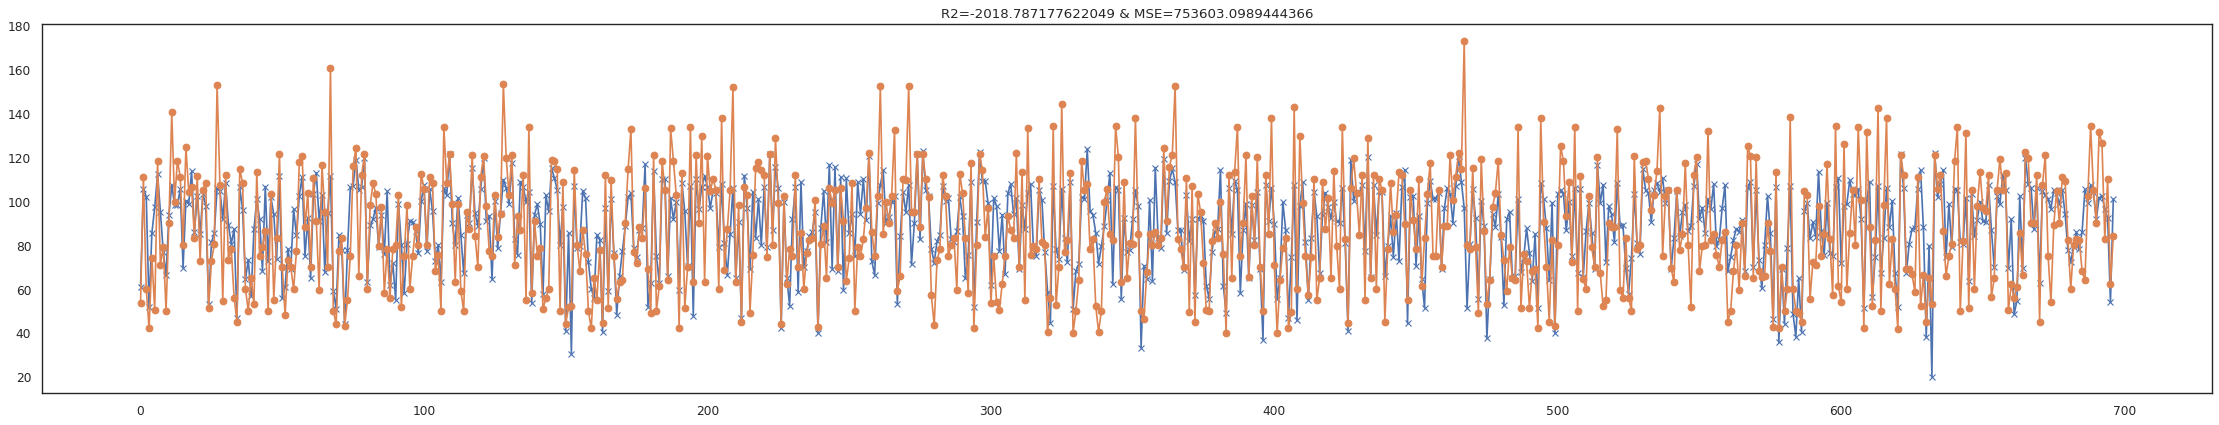

In [100]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(Y_pred_1_poly, label = None, marker = "x")
plt.plot(y_test, label = None, marker = "o")
plt.title(f'R2={r2_1_poly} & MSE={mse_1_poly}')
# plt.legend()
plt.show()

In [101]:
# Gauss Kernel
print(f"Error R2 Gauss Kernel: {r2_1_gaus}")
print(f"Error MSE Gauss Kernel: {mse_1_gaus}")

Error R2 Gauss Kernel: -2128.9674733212355
Error MSE Gauss Kernel: 731713.4814759537


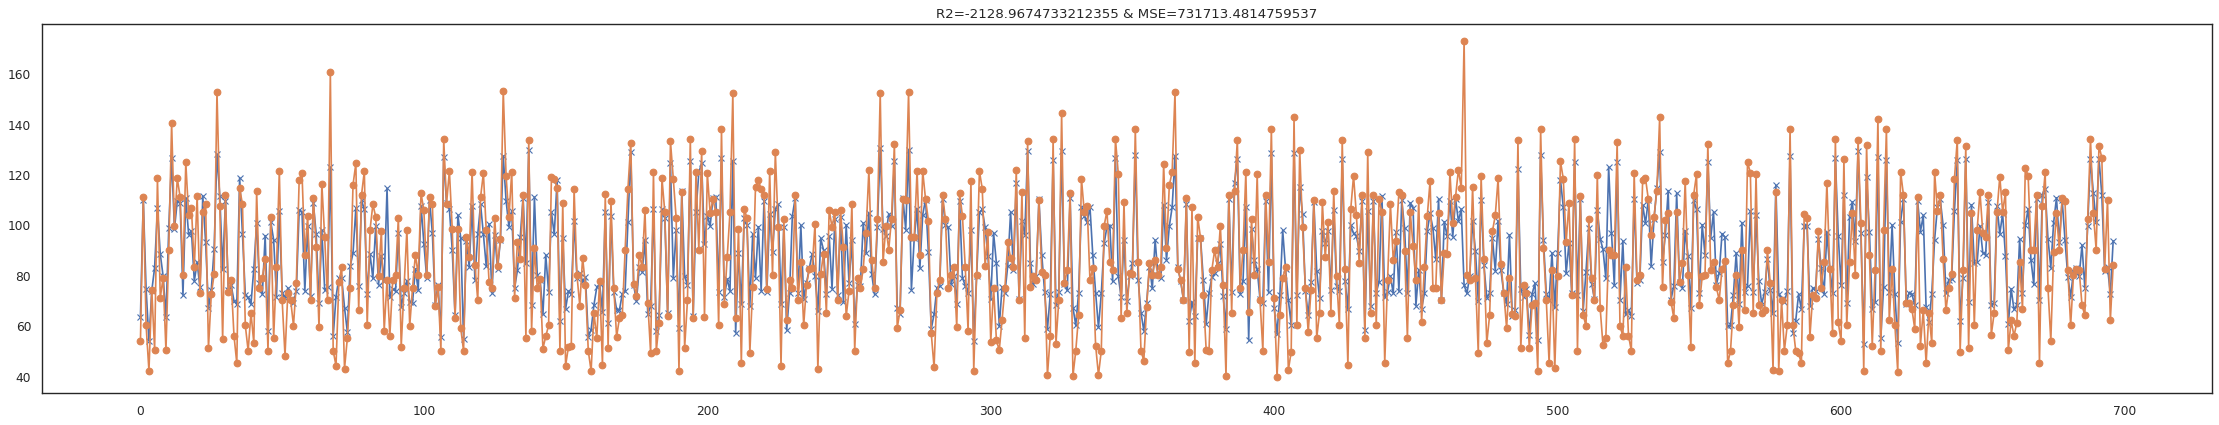

In [102]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(Y_pred_1_gaus, label = None, marker = "x")
plt.plot(y_test, label = None, marker = "o")
plt.title(f'R2={r2_1_gaus} & MSE={mse_1_gaus}')
# plt.legend()
plt.show()

In [103]:
# Various Epsilon

In [104]:
# Poly Kernel
r2_2_poly

[-2016.3976149015969,
 -2018.787177622049,
 -2022.3248255613562,
 -2021.515748542071,
 -2030.428024789799,
 -2035.6863093136142,
 -2052.3800135642996,
 -2061.105727178694,
 -2065.4243303313424,
 -2073.3664428739844]

In [105]:
mse_2_poly

[753955.1266670782,
 753603.0989444366,
 752815.5761155227,
 752715.1465474484,
 750539.7377056191,
 749259.9463014385,
 746188.9839167474,
 744416.2041140519,
 743482.8533146596,
 741918.3845961583]

In [106]:
Y_pred_2_poly_list

[array([ 61.12506837, 105.43720539, 101.73928351,  51.74258658,
         85.37799868,  97.1600905 , 112.09971131,  94.93891749,
         76.85962642,  65.90317456,  93.05854138, 107.3943079 ,
         98.30422441,  97.98694385, 105.41664792,  69.51378103,
        100.29536104,  98.67958866, 113.69301248,  85.58067079,
        102.40854939,  84.74381275, 103.29891547,  97.63022583,
         53.01142316,  81.35488368,  85.30987524, 105.93647965,
        104.63242295,  91.96951306, 108.10765528,  88.80111686,
         80.18977787,  86.99722106,  46.55690811, 106.15852138,
         95.85146092,  64.36447134,  73.10050864,  56.82457265,
         87.22479178, 100.70434518,  91.56876114,  67.93000454,
        106.5499468 ,  72.52693749, 101.5932534 ,  94.09324211,
         73.27797981, 111.55272846,  55.71227818,  61.04361751,
         78.08155823,  68.99972776,  96.15395884,  84.09414738,
        101.84285818, 111.16920405,  74.69338474,  92.11791074,
         65.02567702, 103.28846543, 112.

In [107]:
for i in range(len(epsilon)):
  plt.figure(figsize=(35, 6), dpi=80)
  plt.plot(Y_pred_2_poly_list[i], label = None, marker = "x")
  plt.plot(y_test, label = None, marker = "o")
  plt.title(f'R2={r2_2_poly[i]} & MSE={mse_2_poly[i]} & epsilon={epsilon[i]}')
  # plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

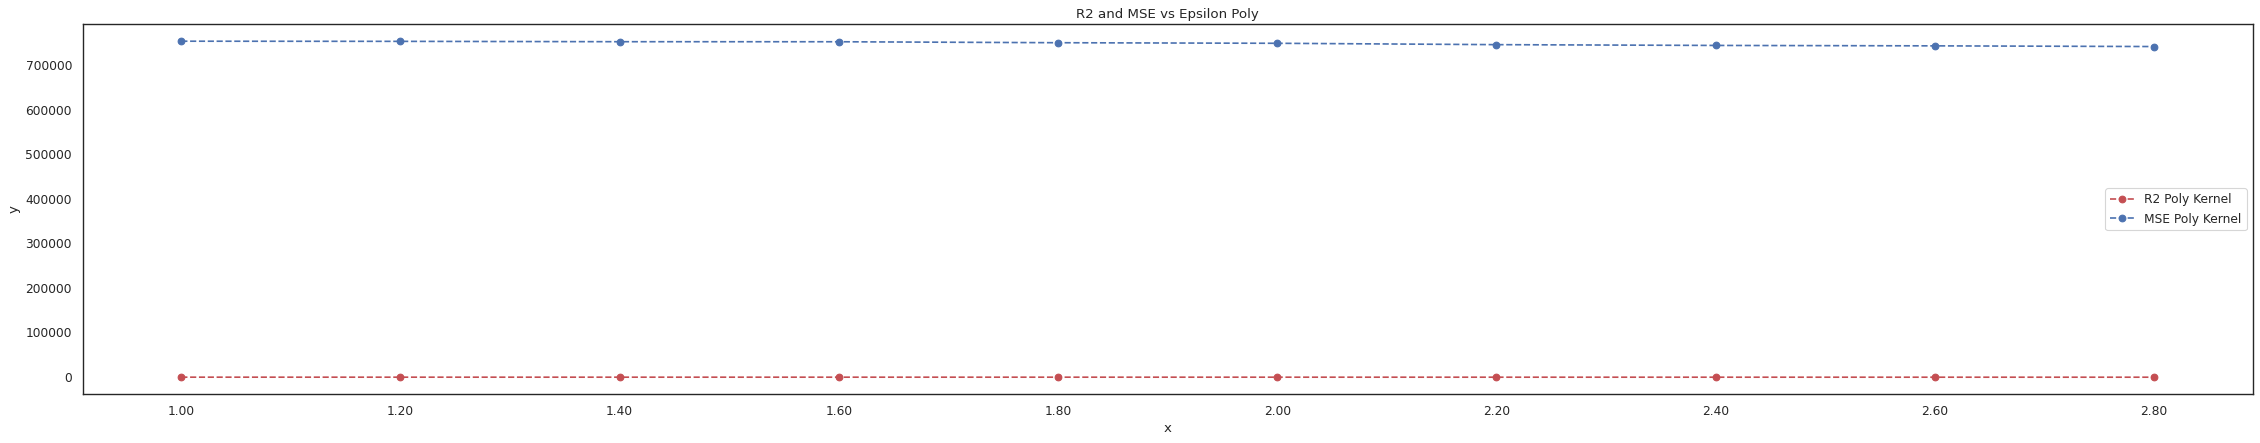

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 6), dpi=80)
x = [ '%.2f' % elem for elem in epsilon ]
# create an index for each tick position
xi = list(range(len(x)))
# plot the index for the x-values
plt.plot(xi, r2_2_poly, marker='o', linestyle='--', color='r', label='R2 Poly Kernel')
plt.plot(xi, mse_2_poly, marker='o', linestyle='--', color='b', label='MSE Poly Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(xi, x)
plt.title('R2 and MSE vs Epsilon Poly')
plt.legend()
plt.show()

In [109]:
# Gaussian Kernel
r2_2_gaus

[-2124.7437498427844,
 -2128.9674733212355,
 -2134.663728255333,
 -2140.3400504428214,
 -2147.6238210212614,
 -2149.499645182468,
 -2151.9134511818224,
 -2147.221044110355,
 -2150.67636836697,
 -2148.6201351968207]

In [110]:
mse_2_gaus

[732437.4614772445,
 731713.4814759537,
 730721.7719658654,
 729742.3871591073,
 728447.4476032513,
 728076.1271333909,
 727641.2610548884,
 728439.2478501403,
 727831.6775288505,
 728157.5076655383]

In [111]:
Y_pred_2_gaus_list

[array([ 63.20834964, 109.91833996,  74.37307386,  53.98523511,
         73.81737188,  82.81323275, 106.37381826,  88.41798059,
         79.58038472,  63.41525597,  98.81349823, 126.57757001,
         98.49886015, 109.42162739, 108.87842721,  71.99800701,
        110.75547774,  96.17109683,  97.41888747,  77.73980641,
         84.85043175,  75.13865878, 111.57451596,  92.95496804,
         66.81291759,  73.95710856,  90.47330858, 127.92553594,
        111.46456146,  82.35201904, 109.60723641,  73.95107092,
         76.21602381,  69.67268308,  68.374494  , 118.7936354 ,
         96.15791121,  72.1091928 ,  71.14880039,  68.38043264,
         82.3983972 , 100.40155258,  76.74715795,  72.36477647,
         95.51472576,  57.54422151, 101.12244731,  93.89673758,
         71.38383028, 105.31830897,  73.05295009,  70.74975328,
         74.8566182 ,  70.30882216,  69.20102994,  73.73223174,
        105.82785662, 104.99971835,  73.75308014,  99.45025025,
         71.71842865, 108.67896076,  96.

In [112]:
for i in range(len(epsilon)):
  plt.figure(figsize=(35, 6), dpi=80)
  plt.plot(Y_pred_2_gaus_list[i], label = None, marker = "x")
  plt.plot(y_test, label = None, marker = "o")
  plt.title(f'R2={r2_2_gaus[i]} & MSE={mse_2_gaus[i]} & epsilon={epsilon[i]}')
  # plt.legend()
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

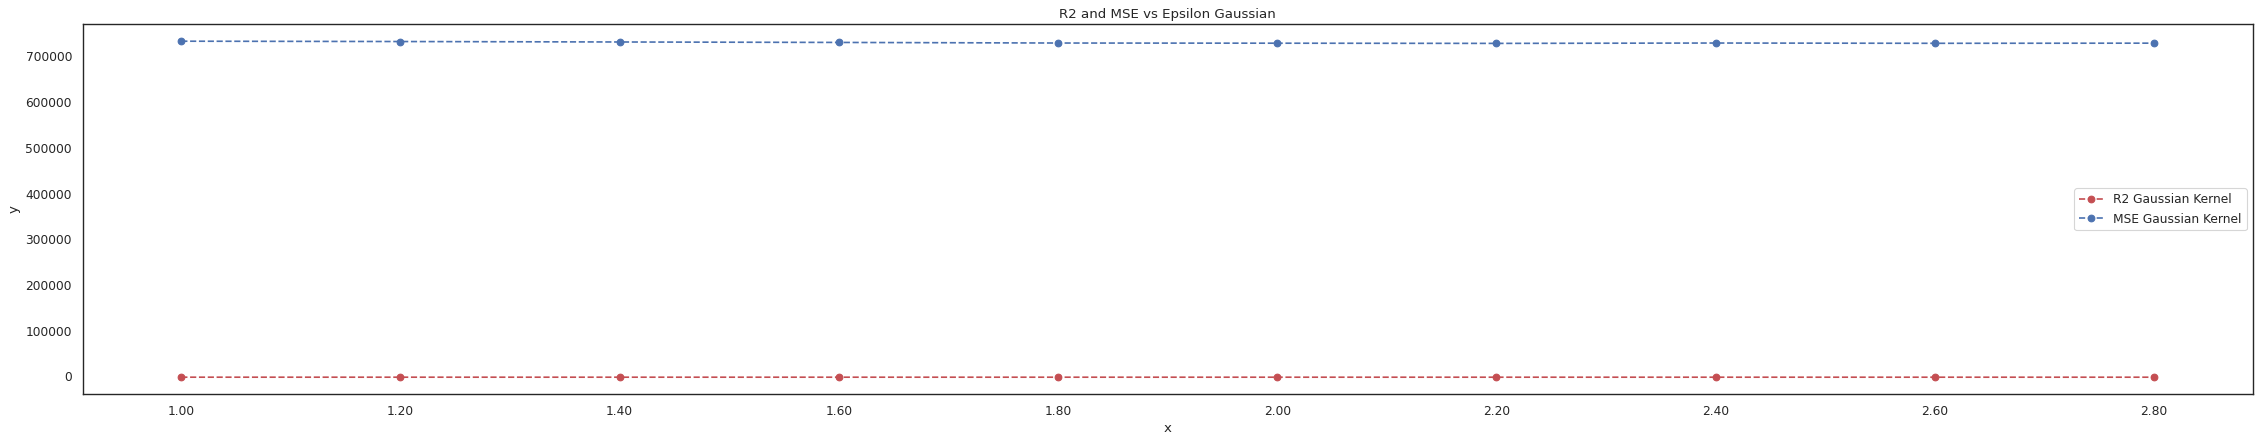

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 6), dpi=80)
x = [ '%.2f' % elem for elem in epsilon ]
# create an index for each tick position
xi = list(range(len(x)))
# plot the index for the x-values
plt.plot(xi, r2_2_gaus, marker='o', linestyle='--', color='r', label='R2 Gaussian Kernel')
plt.plot(xi, mse_2_gaus, marker='o', linestyle='--', color='b', label='MSE Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(xi, x)
plt.title('R2 and MSE vs Epsilon Gaussian')
plt.legend()
plt.show()

# Hasil dan Analisis
Dari percobaan didapatkan untuk nilai epsilon 1.2 dengan metode kernel polynomial dan gaussian memilki R Squared Error negatif. Hal ini disebabkan oleh data yang terlalu overfitting. Terkait dengan MSE pada metode kernel polynomial bernilai lebih besar dibandingkan metode kernel gaussian.

Untuk variasi nilai epsilon, baik metode kernel polynomial maupun gaussian tidak memiliki perubahan yang signifikan untuk nilai R Squared Error dan MSE. Namun dari keseluruhan iterasi epsilon nilai epsilon 2.2 memilki nilai R Squared Error dan MSE terkecil baik dengan metode kernel polynomial dan gaussian.

# Kesimpulan
Dari hasil pemodelan, metode SVM untuk regresi nilai berat penderita obesitas sudah cukup baik dalam mewakilkan prediksi berat penderita obesitas. Namun dari nilai R Squared Error model masih dapat dikatakan overfitting.

Nilai epsilon terbaik untuk minimilisasi error berada pada nilai 2.2.